In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_artist=pd.read_csv('/content/drive/MyDrive/DM2/dataset/tabular/artists.csv')
df_artist.head()

id                      name  popularity  followers  \
0  19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0     9904.0   
1  4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0    13047.0   
2  0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0    11933.0   
3  09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0     4724.0   
4  0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0    42515.0   

                                              genres  
0  ['acid house', 'chicago house', 'chicago rap',...  
1                 ['chicago house', 'classic house']  
2   ['acid house', 'chicago house', 'classic house']  
3                  ['chicago house', 'garage house']  
4  ['chicago house', 'deep house', 'float house',...

In [ ]:
df_artist.columns

Index(['id', 'name', 'popularity', 'followers', 'genres'], dtype='object')

In [ ]:
df_tracks = pd.read_csv('/content/drive/MyDrive/DM2/dataset/tabular/tracks.csv')
df_tracks.head()

id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       290479     False          52             5   
1            1       539229     False          45             5   
2            1       264200     False          39             5   
3            1       387413     False           0             6   
4            1       248956     False           0             1   

                  artists   album_type          album_name  ...  \
0                  Kölsch        album                1989  ...   
1                 Kiasmos        album             Kiasmos  ...   
2         Joris Delacroix        album       Night Visions  ...   
3  Pan-Pot;Anfisa Letyago       single  Confronted Remixes  ...   
4   Kollektiv Turmstrasse  compilation   10 Years Diynamic  ...   

  features_duration_ms time_signature  start_of_fade_out  tempo_confidence  \
0               290479              3          275.90530             0.020   
1               539229              4          517.28253             0.678   
2               264200              3          259.04180             0.847   
3               387414              4          387.41360             0.882   
4               248957              4          239.63574             0.882   

   time_signature_confidence  key_confidence  mode_confidence  n_beats  \
0                      1.000           0.500            0.525    705.0   
1                      0.326           0.410            0.589   1074.0   
2                      0.457           0.904            0.760    516.0   
3                      0.498           0.512            0.503    826.0   
4                      1.000           0.474            0.459    493.0   

   n_bars           genre  
0   234.0  minimal-techno  
1   269.0  minimal-techno  
2   171.0  minimal-techno  
3   207.0  minimal-techno  
4   123.0  minimal-techno  

[5 rows x 34 columns]

# Artist Dataset Analysis

In [ ]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30141 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30140 non-null  object 
 1   name        30139 non-null  object 
 2   popularity  30140 non-null  float64
 3   followers   30140 non-null  float64
 4   genres      30140 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
df_artist.columns

Index(['id', 'name', 'popularity', 'followers', 'genres'], dtype='object')

In [ ]:
df_tracks.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre'],
      dtype='object')

In [ ]:
# prompt: Write me the code for getting 10 most popular genres by counting each genre separately. Most popular in terms of follower of the artists. . Use only Artist dataset. Take into account each genre in the list separate.

# Assuming 'genres' column contains a list of genres for each artist.
# If it's a string, you'll need to adjust the splitting logic below.

# Create a dictionary to store the total followers for each genre.
genre_followers = {}

for index, row in df_artist.iterrows():
  followers = row['followers']
  genres = row['genres']

  # Check if the 'genres' column is a string. If so, split it by comma.
  if isinstance(genres, str):
    genres_list = genres.split(',')  # Assuming genres are comma-separated
    for genre in genres_list:
        genre = genre.strip() # Remove whitespace
        if genre:
            if genre in genre_followers:
                genre_followers[genre] += followers
            else:
                genre_followers[genre] = followers

  # Check if the 'genres' column is a list
  elif isinstance(genres, list):
    for genre in genres:
        if genre:
            if genre in genre_followers:
                genre_followers[genre] += followers
            else:
                genre_followers[genre] = followers
  # Handle cases where 'genres' is neither a string nor a list
  elif pd.isnull(genres):
    continue
  else:
    print(f"Unexpected 'genres' type encountered: {type(genres)}")


# Sort genres by their total followers in descending order.
sorted_genres = dict(sorted(genre_followers.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 most popular genres.
top_10_genres = dict(list(sorted_genres.items())[:10])

top_10_genres

{"'pop']": 1004030518.0,
 "'urbano latino']": 836072755.0,
 "'pop'": 828337028.0,
 "'rock']": 778136918.0,
 "'trap latino'": 678831910.0,
 "['filmi'": 576578251.0,
 "'modern bollywood']": 559454187.0,
 "'rap']": 550084938.0,
 "'hip hop'": 536045443.0,
 "['dance pop'": 490693304.0}

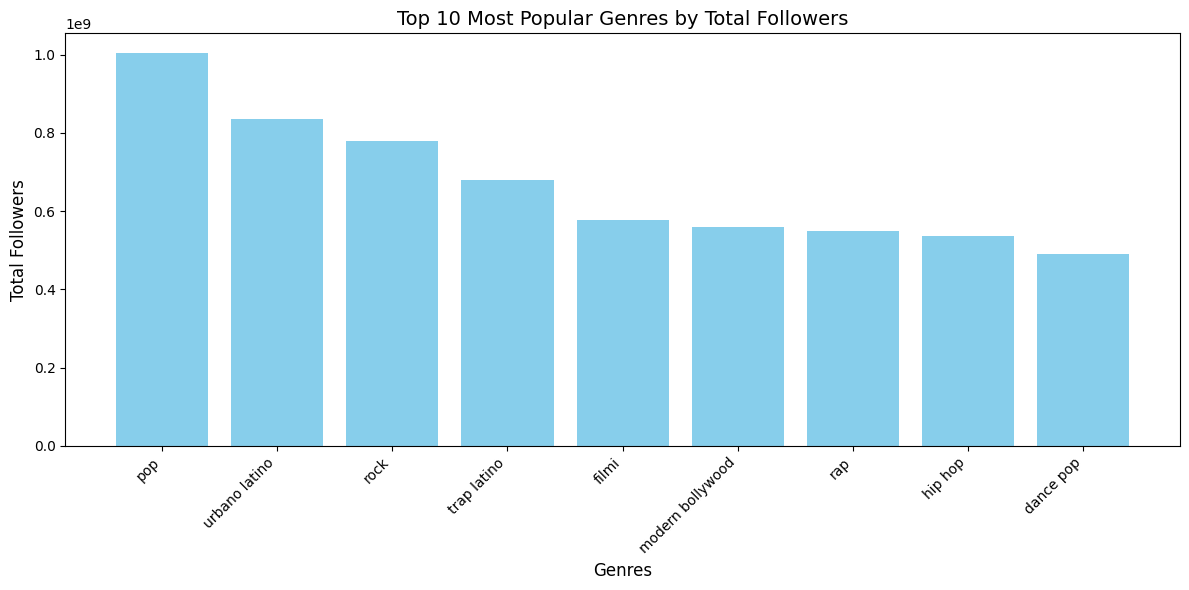

In [ ]:
# prompt: Visualize the results of previous cell in appropirate chart. Remove the unnecessary puncations from the text of genre names. such as making 'pop'] as Pop

import matplotlib.pyplot as plt

# Prepare data for plotting
genres = list(top_10_genres.keys())
followers = list(top_10_genres.values())

#Clean the genre names
cleaned_genres = []
for genre in genres:
  cleaned_genre = genre.replace("'", "").replace("[", "").replace("]","").replace('"','').strip()
  cleaned_genres.append(cleaned_genre)


# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(cleaned_genres, followers, color='skyblue')
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Total Followers", fontsize=12)
plt.title("Top 10 Most Popular Genres by Total Followers", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

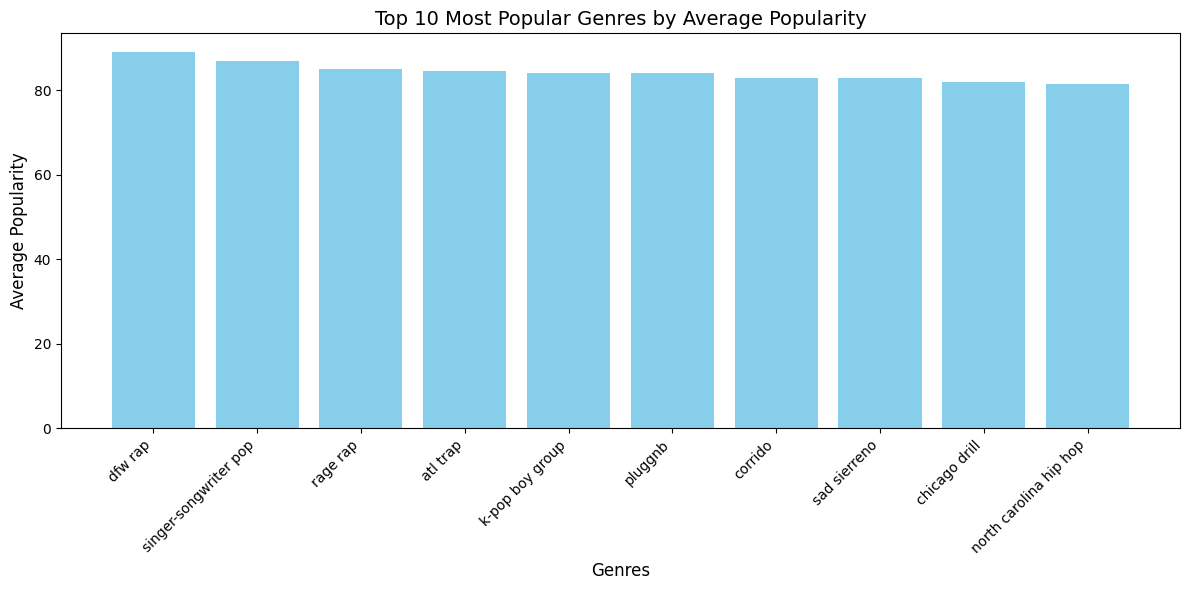

In [ ]:
# prompt: Find something interesting from the Artist dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_artist and df_tracks are already loaded as in the previous code.

# Calculate the average popularity for each genre.
genre_popularity = {}
for index, row in df_artist.iterrows():
    popularity = row['popularity']
    genres = row['genres']
    if isinstance(genres, str):
        genres_list = genres.split(',')
        for genre in genres_list:
            genre = genre.strip()
            if genre:
                if genre in genre_popularity:
                    genre_popularity[genre].append(popularity)
                else:
                    genre_popularity[genre] = [popularity]
    elif isinstance(genres, list):
        for genre in genres:
            if genre:
                if genre in genre_popularity:
                    genre_popularity[genre].append(popularity)
                else:
                    genre_popularity[genre] = [popularity]
    elif pd.isnull(genres):
        continue
    else:
        print(f"Unexpected 'genres' type encountered: {type(genres)}")


average_genre_popularity = {}
for genre, popularity_list in genre_popularity.items():
    average_genre_popularity[genre] = np.mean(popularity_list)

# Sort genres by average popularity in descending order.
sorted_genres_popularity = dict(sorted(average_genre_popularity.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 genres by average popularity.
top_10_genres_popularity = dict(list(sorted_genres_popularity.items())[:10])

# Prepare data for plotting
genres = list(top_10_genres_popularity.keys())
popularity = list(top_10_genres_popularity.values())

#Clean the genre names
cleaned_genres = []
for genre in genres:
  cleaned_genre = genre.replace("'", "").replace("[", "").replace("]","").replace('"','').strip()
  cleaned_genres.append(cleaned_genre)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(cleaned_genres, popularity, color='skyblue')
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Average Popularity", fontsize=12)
plt.title("Top 10 Most Popular Genres by Average Popularity", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df_artist.isna().sum()

id            1
name          2
popularity    1
followers     1
genres        1
dtype: int64

In [ ]:
# Display rows with missing data in the 'df_artist' DataFrame.
rows_with_missing_data = df_artist[df_artist.isna().any(axis=1)]
rows_with_missing_data

id name  popularity  followers genres
11872                     NaN  NaN         NaN        NaN    NaN
21223  4oPYazJJ1o4rWBrTw9lm40  NaN        47.0    35655.0     []

In [ ]:
# Drop rows with any missing values in 'df_artist'
df_artist = df_artist.dropna()

df_artist.head()

id                      name  popularity  followers  \
0  19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0     9904.0   
1  4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0    13047.0   
2  0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0    11933.0   
3  09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0     4724.0   
4  0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0    42515.0   

                                              genres  
0  ['acid house', 'chicago house', 'chicago rap',...  
1                 ['chicago house', 'classic house']  
2   ['acid house', 'chicago house', 'classic house']  
3                  ['chicago house', 'garage house']  
4  ['chicago house', 'deep house', 'float house',...

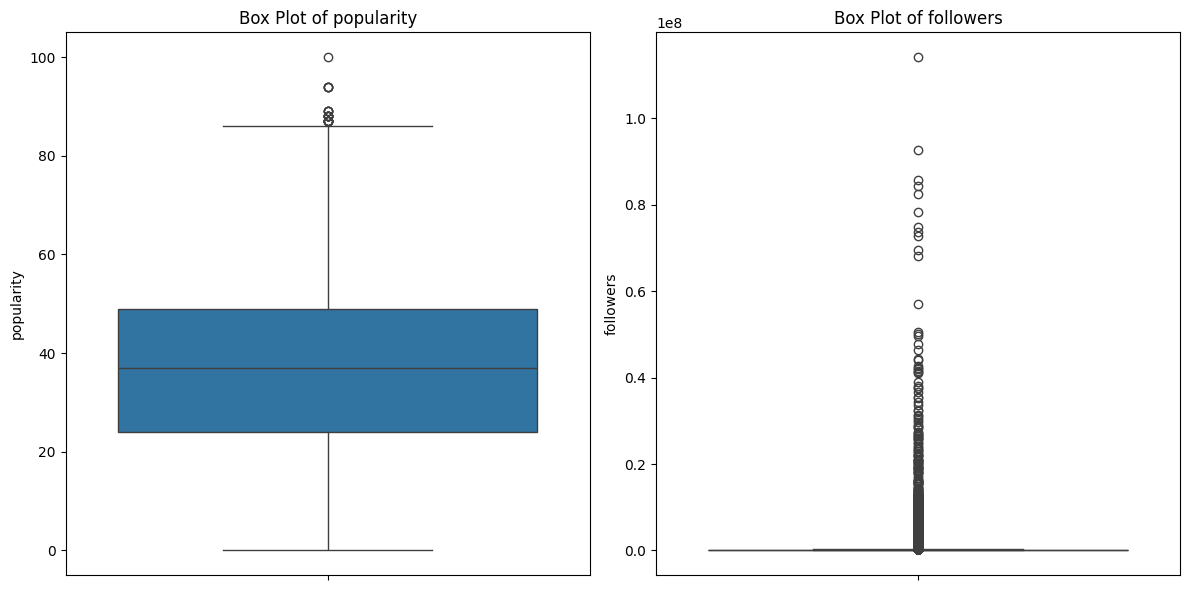

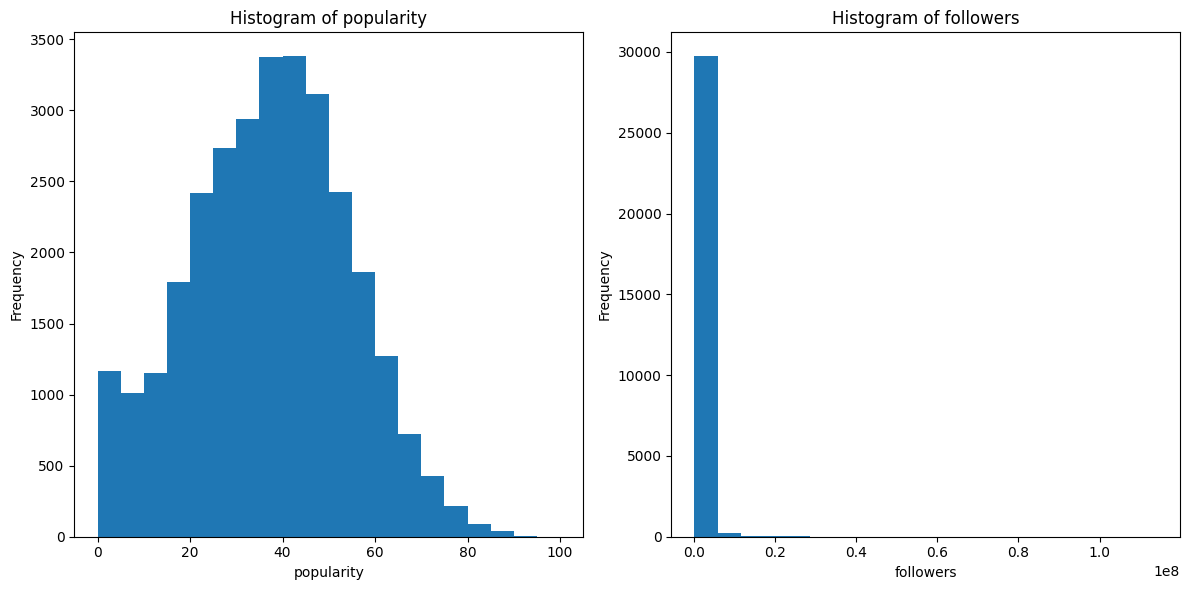

In [ ]:
#
# Check for outliers in numerical columns using box plots
numerical_cols = ['popularity', 'followers']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df_artist[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Check for outliers using histograms
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    plt.hist(df_artist[col], bins=20)  # Adjust bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Tracks Dataset Analysis

In [ ]:
df_tracks.head(5)

id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       290479     False          52             5   
1            1       539229     False          45             5   
2            1       264200     False          39             5   
3            1       387413     False           0             6   
4            1       248956     False           0             1   

                  artists   album_type          album_name  ...  \
0                  Kölsch        album                1989  ...   
1                 Kiasmos        album             Kiasmos  ...   
2         Joris Delacroix        album       Night Visions  ...   
3  Pan-Pot;Anfisa Letyago       single  Confronted Remixes  ...   
4   Kollektiv Turmstrasse  compilation   10 Years Diynamic  ...   

  features_duration_ms time_signature  start_of_fade_out  tempo_confidence  \
0               290479              3          275.90530             0.020   
1               539229              4          517.28253             0.678   
2               264200              3          259.04180             0.847   
3               387414              4          387.41360             0.882   
4               248957              4          239.63574             0.882   

   time_signature_confidence  key_confidence  mode_confidence  n_beats  \
0                      1.000           0.500            0.525    705.0   
1                      0.326           0.410            0.589   1074.0   
2                      0.457           0.904            0.760    516.0   
3                      0.498           0.512            0.503    826.0   
4                      1.000           0.474            0.459    493.0   

   n_bars           genre  
0   234.0  minimal-techno  
1   269.0  minimal-techno  
2   171.0  minimal-techno  
3   207.0  minimal-techno  
4   123.0  minimal-techno  

[5 rows x 34 columns]

In [ ]:
df_tracks.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre'],
      dtype='object')

In [ ]:
# prompt: show me one record of dataset with all the columns.

df_tracks.iloc[1000]

id                              19C3bmijuVj9xJdXvPhQsa
name                                      Salió El Sol
disc_number                                          1
duration_ms                                     317280
explicit                                         False
popularity                                           0
track_number                                         7
artists                                       Don Omar
album_type                                 compilation
album_name                      Reggaeton Mix Perreito
album_release_date                          2022-10-07
album_release_date_precision                       day
album_total_tracks                                  30
danceability                                     0.886
energy                                           0.708
key                                                  4
loudness                                        -5.915
mode                                                 0
speechiness                                     0.0911
acousticness                                     0.107
instrumentalness                                0.0114
liveness                                         0.044
valence                                          0.965
tempo                                          109.976
features_duration_ms                            317280
time_signature                                       4
start_of_fade_out                            305.15665
tempo_confidence                                 0.952
time_signature_confidence                          1.0
key_confidence                                   0.162
mode_confidence                                  0.361
n_beats                                          577.0
n_bars                                           144.0
genre                                          hip-hop
Name: 1000, dtype: object

In [ ]:
df_tracks['genre'].unique()

array(['minimal-techno', 'hip-hop', 'honky-tonk', 'house', 'idm',
       'indian', 'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance',
       'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'alternative',
       'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'sleep', 'songwriter', 'soul', 'spanish', 'study',
       'swedish', 'synth-pop', 'tango', 'techno', 'trance', 'trip-hop',
       'turkish', 'world-music', 'edm', 'electro', 'electronic', 'emo',
       'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel',
       'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'acoustic',
       'afrobeat', 'alt-rock', 'happy', 'hard-rock', 'hardcore',
       'hardstyle', 'heavy-metal', 'mandopop', 'metal', 'metalcore',
       'pop-film', 'pop', 'power-pop', 'progressive-house', 'psych-rock',
       'punk-rock', 'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll',
       'rock', 'rockabilly', 'romance', 'sad', 'salsa', 'samba',
       'sert

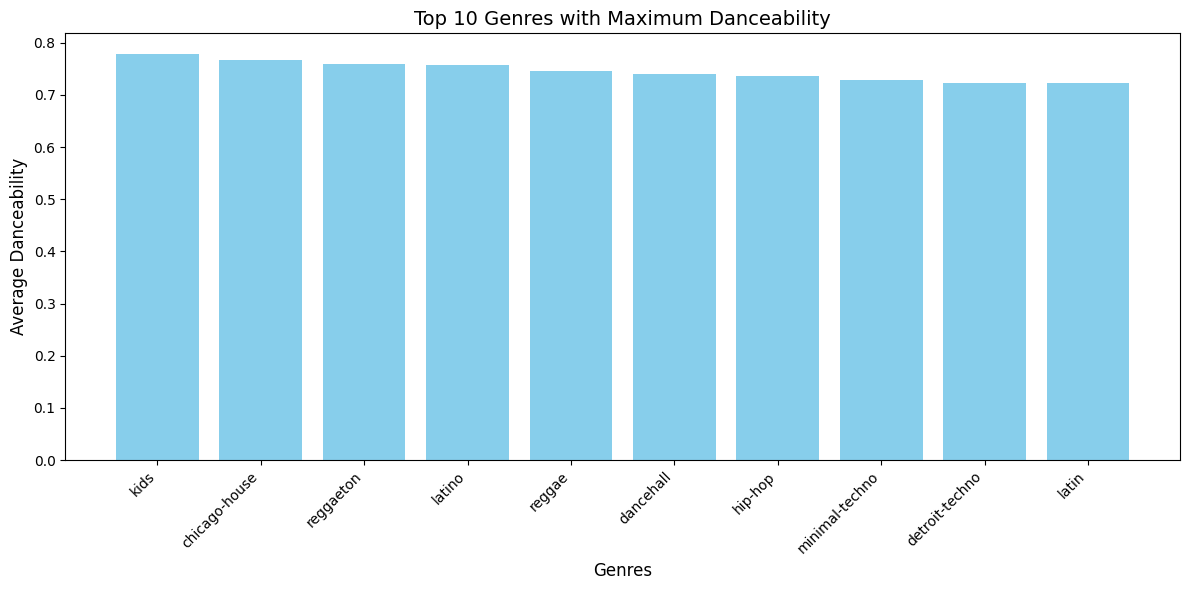

In [ ]:
# prompt: Using df_tracks, find top 10 genres with maximum dancebility and make a chart of it

# Assuming df_tracks is already loaded as in the provided code.

# Group by genre and calculate the mean danceability for each genre.
genre_danceability = df_tracks.groupby('genre')['danceability'].mean()

# Sort genres by danceability in descending order and get the top 10.
top_10_danceable_genres = genre_danceability.sort_values(ascending=False).head(10)

# Create the bar chart.
plt.figure(figsize=(12, 6))
plt.bar(top_10_danceable_genres.index, top_10_danceable_genres.values, color='skyblue')
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Average Danceability", fontsize=12)
plt.title("Top 10 Genres with Maximum Danceability", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

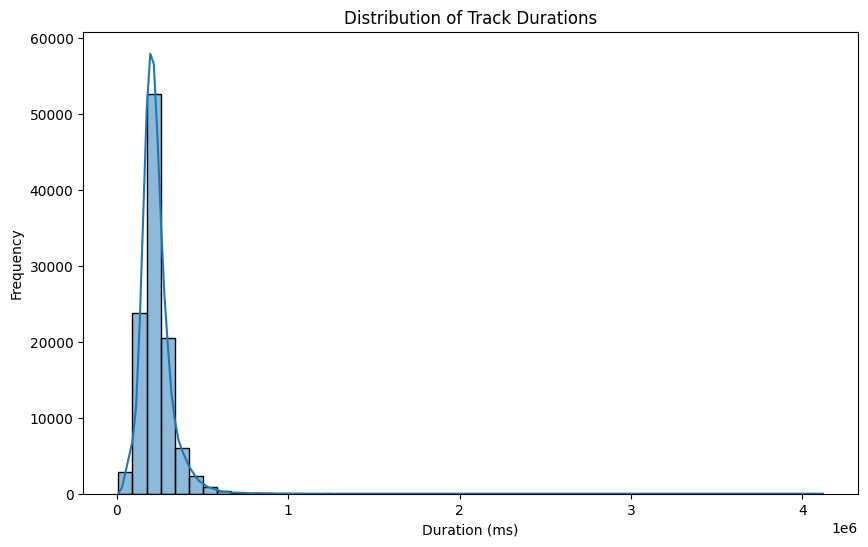

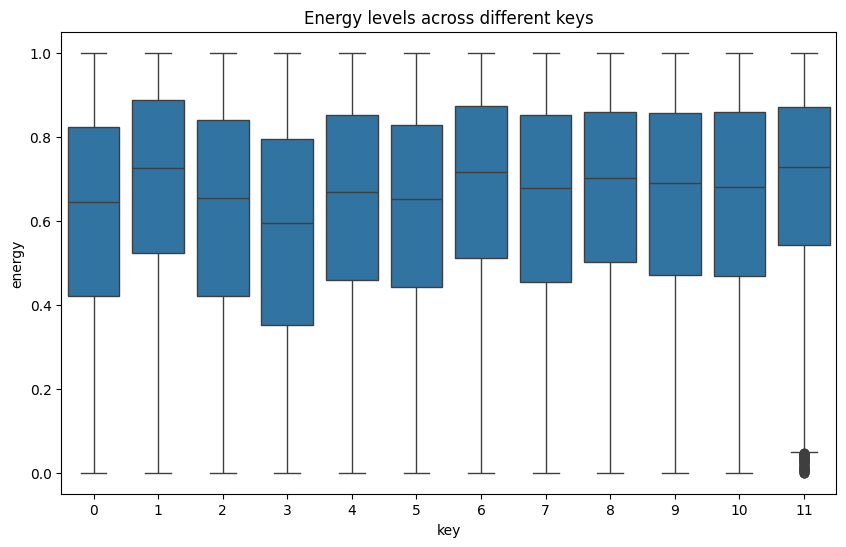

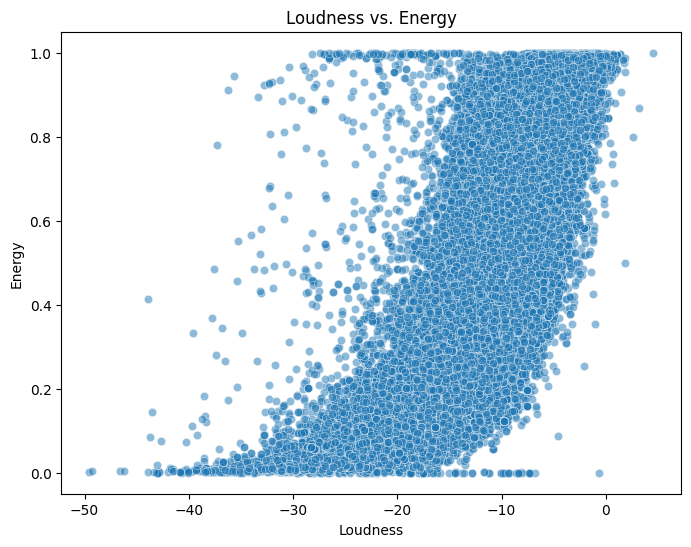

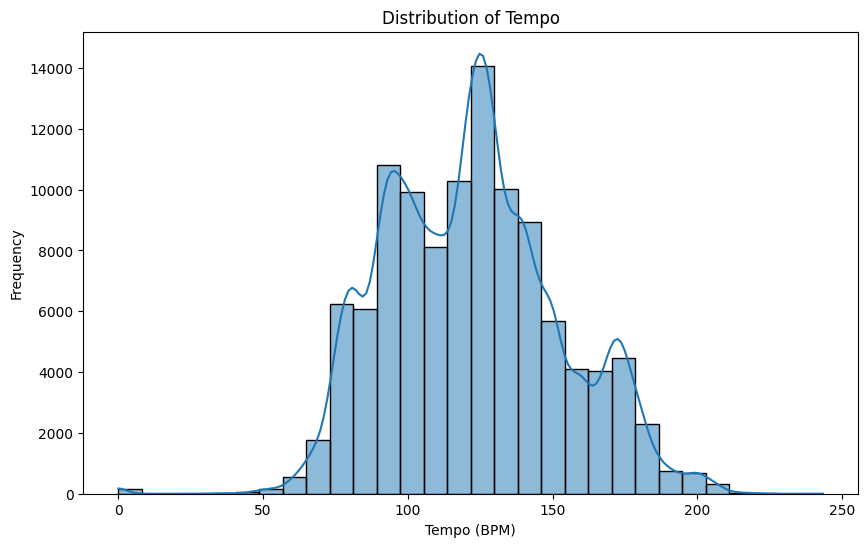

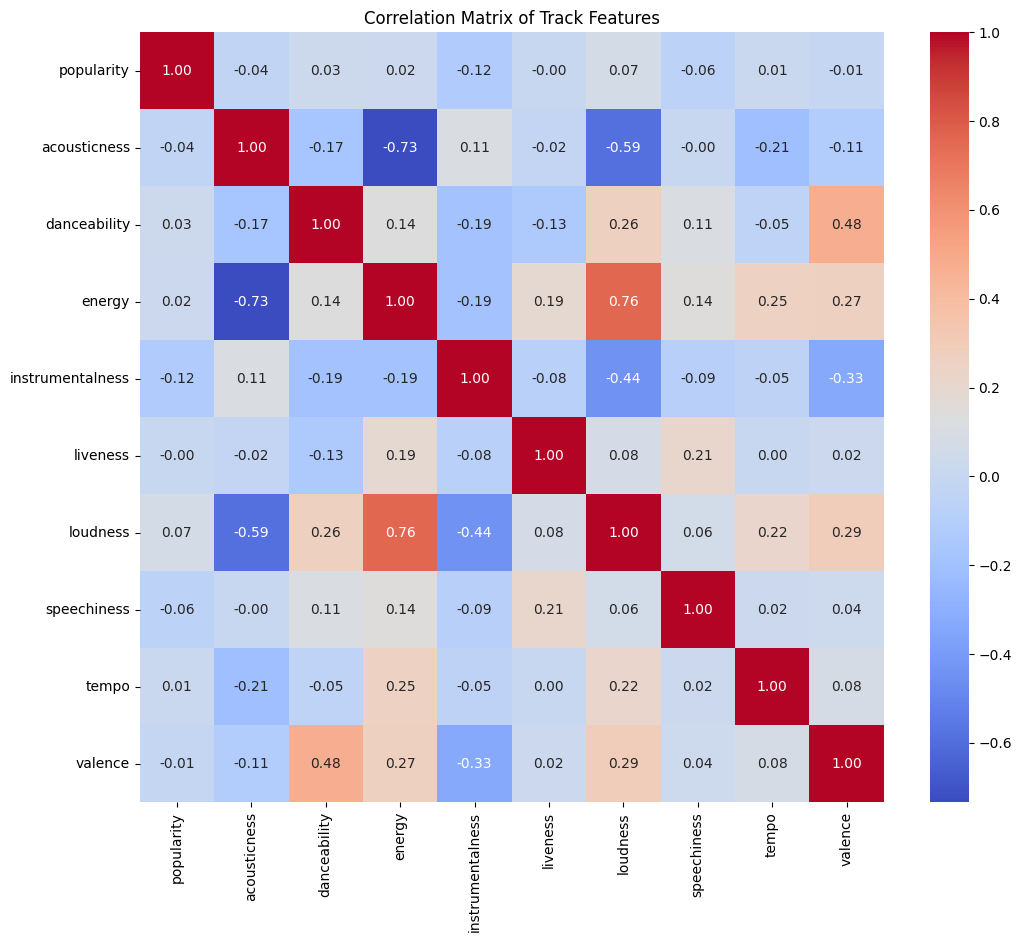

In [ ]:
# prompt: Make some interesting and creative analysis from only the tracks dataframe

# Assuming df_tracks is already loaded as in the provided code.

# Analyze the distribution of track durations.
plt.figure(figsize=(10, 6))
sns.histplot(df_tracks['duration_ms'], bins=50, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Relationship between key and energy
plt.figure(figsize=(10,6))
sns.boxplot(x='key', y='energy', data=df_tracks)
plt.title('Energy levels across different keys')
plt.show()


# Analyze the relationship between loudness and energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loudness', y='energy', data=df_tracks, alpha=0.5)
plt.title('Loudness vs. Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()


# Explore the distribution of tempo
plt.figure(figsize=(10, 6))
sns.histplot(df_tracks['tempo'], bins=30, kde=True)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

#Correlation matrix
corr_matrix = df_tracks[['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Track Features')
plt.show()

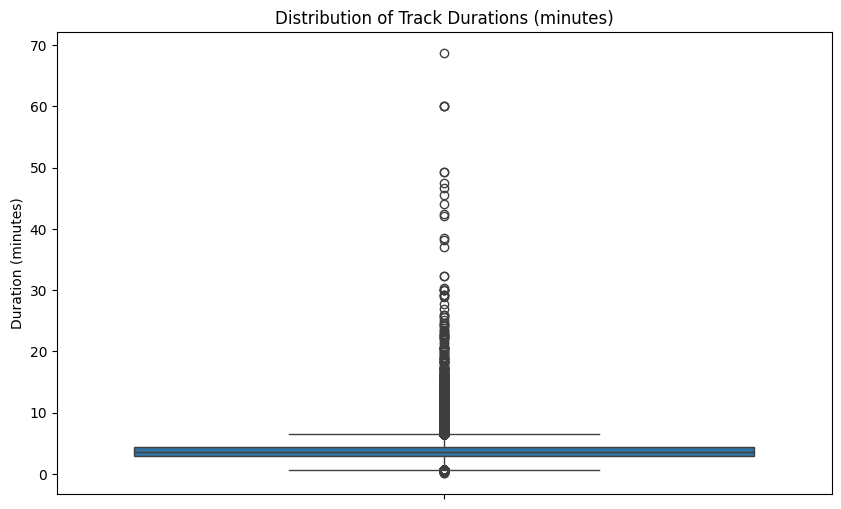

In [ ]:
# prompt: the first chart: distribution of tracks duration. Can you please covert the unit from MS to minutes? and make box plot instead

# Assuming df_tracks is already loaded as in the provided code.

# Convert duration from milliseconds to minutes
df_tracks['duration_min'] = df_tracks['duration_ms'] / 60000

# Analyze the distribution of track durations in minutes using a box plot.
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_tracks['duration_min'])
plt.title('Distribution of Track Durations (minutes)')
plt.ylabel('Duration (minutes)')
plt.show()

In [ ]:
df_tracks.head(2)

id    name  disc_number  duration_ms  explicit  \
0  4rjA5kJJWbwU1prXCvg6Fk    Grey            1       290479     False   
1  6xzpUzzIquIyUzTLbbgSdI  Thrown            1       539229     False   

   popularity  track_number  artists album_type album_name  ...  \
0          52             5   Kölsch      album       1989  ...   
1          45             5  Kiasmos      album    Kiasmos  ...   

  time_signature start_of_fade_out  tempo_confidence  \
0              3         275.90530             0.020   
1              4         517.28253             0.678   

   time_signature_confidence  key_confidence  mode_confidence  n_beats  \
0                      1.000            0.50            0.525    705.0   
1                      0.326            0.41            0.589   1074.0   

   n_bars           genre  duration_min  
0   234.0  minimal-techno      4.841317  
1   269.0  minimal-techno      8.987150  

[2 rows x 35 columns]

In [ ]:

# prompt: show me all the tracks with duration considered as outlier and. convert duration in minutes from duration_ms

# Calculate Q1, Q3, and IQR for duration_min
Q1 = df_tracks['duration_min'].quantile(0.25)
Q3 = df_tracks['duration_min'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_tracks[(df_tracks['duration_min'] < lower_bound) | (df_tracks['duration_min'] > upper_bound)]

# Display outlier tracks
outliers[['name', 'artists', 'duration_min']].head(5)

name                      artists  duration_min
1           Thrown                      Kiasmos      8.987150
5       Time Again  Jan Blomqvist;Alar;Korolova      8.362283
7          Cloches                      Worakls      6.984117
8        Conscious                     Ann Clue      7.584000
11  Happiness Lies                Boris Brejcha      8.735983

In [ ]:
# prompt: show me the tracks which have duration higher than 15 minutes

# Filter tracks with duration greater than 15 minutes
long_tracks = df_tracks[df_tracks['duration_min'] > 15]

# Display the filtered tracks
long_tracks[['name', 'artists', 'duration_min']]

name                     artists  \
3701                     April.#2 - Live             KASHIWA Daisuke   
3799                               Glass  alva noto;Ryuichi Sakamoto   
3809                                  e0                    Autechre   
4494    Tumhe Dil Lagi Bhool Jani Padegi       Nusrat Fateh Ali Khan   
4522      Sri Venkateshwara Suprabhatham          M. S. Subbulakshmi   
...                                  ...                         ...   
105152                              Them      Richie Hawtin;F.U.S.E.   
105465                     I Can Take It          Theo Parrish;Dwele   
105711        Various Mixed KDJ Rarities                   Moodymann   
105807       Stop Bajon - TP Translation                Theo Parrish   
109233              (RE)EVOLUTION VOL. 2                 Dirt Monkey   

        duration_min  
3701       27.733333  
3799       36.977100  
3809       15.743550  
4494       16.390517  
4522       20.682400  
...              ...  
105152     15.937817  
105465     16.702433  
105711     17.095100  
105807     16.000000  
109233     25.948050  

[136 rows x 3 columns]

In [ ]:
# prompt: show me the tracks which have duration higher than 15 minutes

# Filter tracks with duration greater than 15 minutes
long_tracks = df_tracks[df_tracks['duration_min'] > 30]

# Display the filtered tracks
long_tracks[['name', 'artists', 'duration_min']]

name  \
3799                                                Glass   
8827                                  Beyond Tribes Pt. 1   
21537     Welcome To The Jungle - Continuous DJ Mix Pt. 1   
22135                             Nature Sounds Rain Long   
22407                          Vacuum Cleaner White Noise   
34143                  Ruido Rosa Puro - Una Hora Versión   
38374                             Tum Ek Gorakh Dhanda Ho   
38462                                   Sanson Ki Mala Pe   
38671                       Chalo Ramiye - Non Stop Garba   
83104                                  Ocean Waves Sounds   
83231                    Electric Fan (Sound Masking Fan)   
85623                                      Shiv Amritwani   
89806                              Hits Of Immanuel Henry   
92542           Ram Ram Jai Raja Ram Ram Ram Jai Sita Ram   
92633            Chanting of the Gayatri Mantra 108 Times   
98280                    Der ultimative Wendler Hitmix XL   
99951   Welcome To The Jungle Vol. 2 - Continuous DJ M...   
100103       Bass Shakers 2015 - Continuous DJ Mix, Pt. 1   
100150  Welcome To The Jungle Vol. 2 - Continuous DJ M...   
103713                Reggae Dancehall Riddim: Nanny Goat   

                                                  artists  duration_min  
3799                           alva noto;Ryuichi Sakamoto     36.977100  
8827                           Zhoobin Askarieh;Ali Sasha     32.293867  
21537                                    Deekline;Ed Solo     45.554283  
22135                                       Nature Sounds     32.389667  
22407                          Vacuum Cleaner White Noise     60.002000  
34143                                     El Ruido Blanco     60.028217  
38374                               Nusrat Fateh Ali Khan     30.290783  
38462                               Nusrat Fateh Ali Khan     30.008667  
38671   Divya Kumar;Priya Saraiya;Ishani Dave;Jigardha...     30.059467  
83104                                        Ocean Sounds     68.670967  
83231                                     Electric Dreams     60.000233  
85623                                    Anuradha Paudwal     49.297333  
89806                                      Immanuel Henry     47.518483  
92542                                 Rattan Mohan Sharma     42.409350  
92633                                       Pandit Jasraj     44.114433  
98280                                     Michael Wendler     49.322433  
99951                                    Ed Solo;Deekline     42.057133  
100103                                          Lady Waks     46.616400  
100150                                   Ed Solo;Deekline     38.125700  
103713  Buju Banton;Garnett Silk;Sanchez;Tony Rebel;Ri...     38.480100

In [ ]:
# prompt: Excluding and including the outlier tracks, give me average track duration

# Calculate the average track duration including outliers
average_duration_including_outliers = df_tracks['duration_min'].mean()
print(f"Average track duration (including outliers): {average_duration_including_outliers:.2f} minutes")

# Calculate the average track duration excluding outliers
#Using the previously calculated bounds
average_duration_excluding_outliers = df_tracks[(df_tracks['duration_min'] >= lower_bound) & (df_tracks['duration_min'] <= upper_bound)]['duration_min'].mean()
print(f"Average track duration (excluding outliers): {average_duration_excluding_outliers:.2f} minutes")

Average track duration (including outliers): 3.80 minutes
Average track duration (excluding outliers): 3.58 minutes


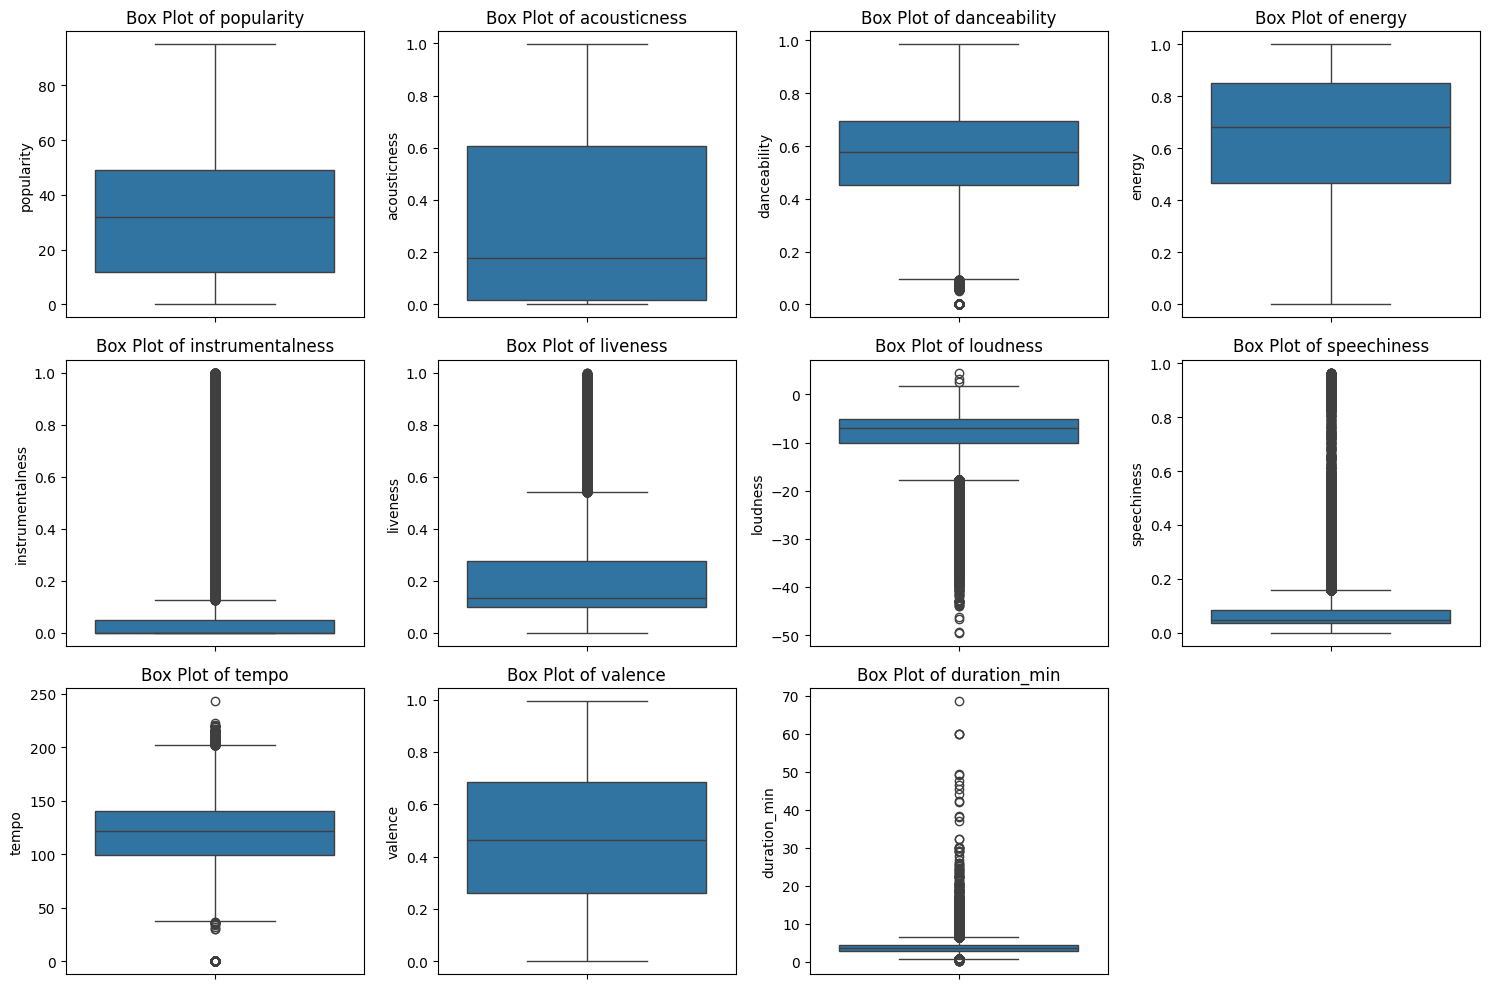

In [ ]:
# prompt: show me box plot of all appropriate columns in track dataset.

# Assuming df_tracks is already loaded as in the provided code.

# Select numerical columns for box plots
numerical_cols = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_min']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(y=df_tracks[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
df_tracks[['album_release_date', 'album_release_date_precision']]

album_release_date album_release_date_precision
0              2017-09-22                          day
1              2014-10-27                          day
2              2018-06-22                          day
3              2019-12-06                          day
4              2016-09-16                          day
...                   ...                          ...
109542         2022-10-21                          day
109543         2018-11-16                          day
109544         2010-11-22                          day
109545         2015-11-25                          day
109546         2022-10-12                          day

[109547 rows x 2 columns]

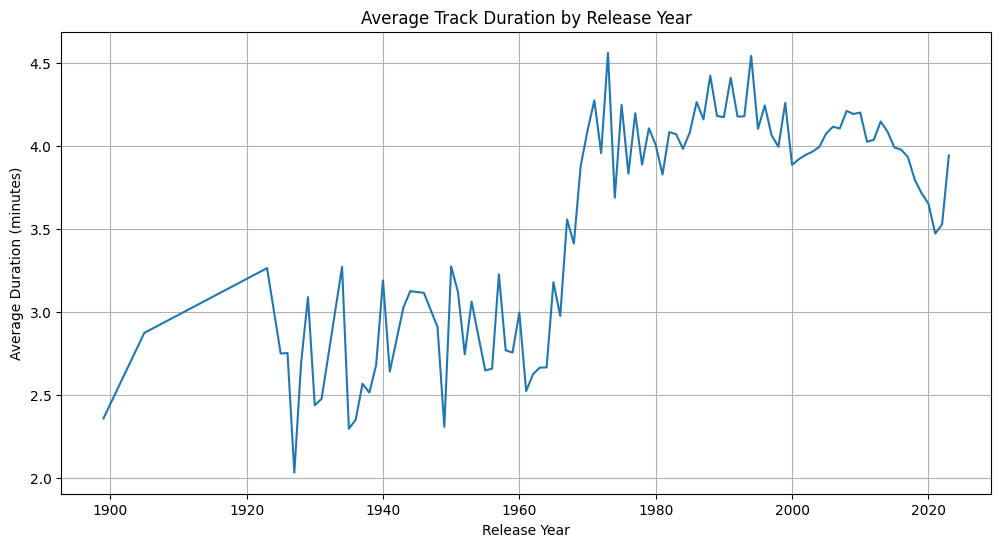

In [ ]:
# prompt: can you make a comparison of release year with average duration of song?

# Convert 'album_release_date' to datetime objects, handling errors
df_tracks['album_release_date'] = pd.to_datetime(df_tracks['album_release_date'], errors='coerce')

# Extract the release year
df_tracks['release_year'] = df_tracks['album_release_date'].dt.year

# Group by release year and calculate the average duration
average_duration_by_year = df_tracks.groupby('release_year')['duration_min'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(average_duration_by_year.index, average_duration_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Track Duration by Release Year')
plt.grid(True)
plt.show()

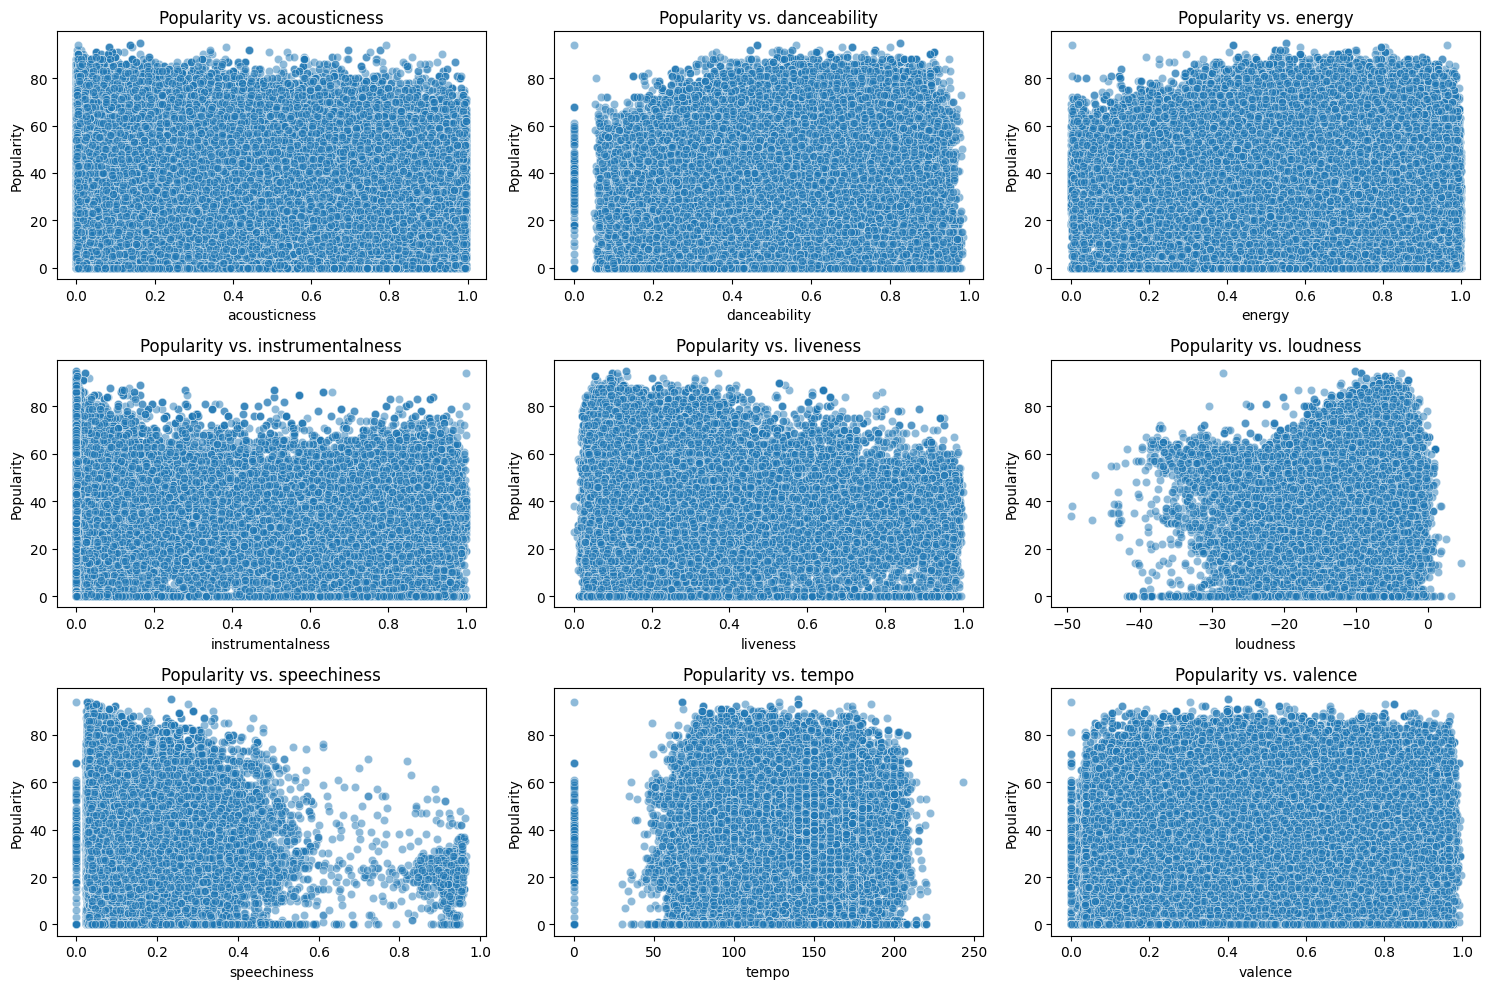

              count       mean        std  min   25%   50%   75%   max
genre                                                                 
acoustic     1000.0  39.561000  18.279782  0.0  28.0  42.0  53.0  82.0
afrobeat     1000.0  22.640000  12.072786  0.0  17.0  21.0  28.0  78.0
alt-rock     1000.0  33.912000  31.657170  0.0   0.0  44.0  65.0  91.0
alternative  1001.0  24.408591  32.974322  0.0   0.0   0.0  63.0  91.0
ambient      1000.0  42.263000  20.167364  0.0  32.0  49.0  55.0  85.0
anime        1000.0  45.787000  16.434528  0.0  40.0  49.0  56.0  83.0
black-metal  1000.0  21.540000  10.816904  0.0  17.0  19.0  22.0  58.0
bluegrass    1000.0  25.191000   9.717868  0.0  22.0  25.0  29.0  69.0
blues        1000.0  30.468000  28.427576  0.0   0.0  34.0  58.0  87.0
brazil       1000.0  43.411000  13.520314  0.0  43.0  47.0  50.0  81.0


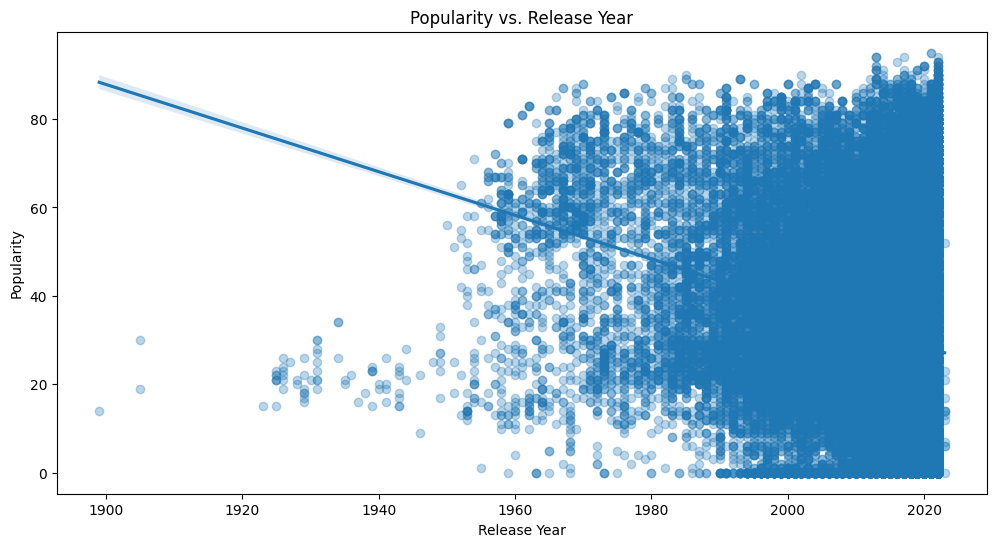

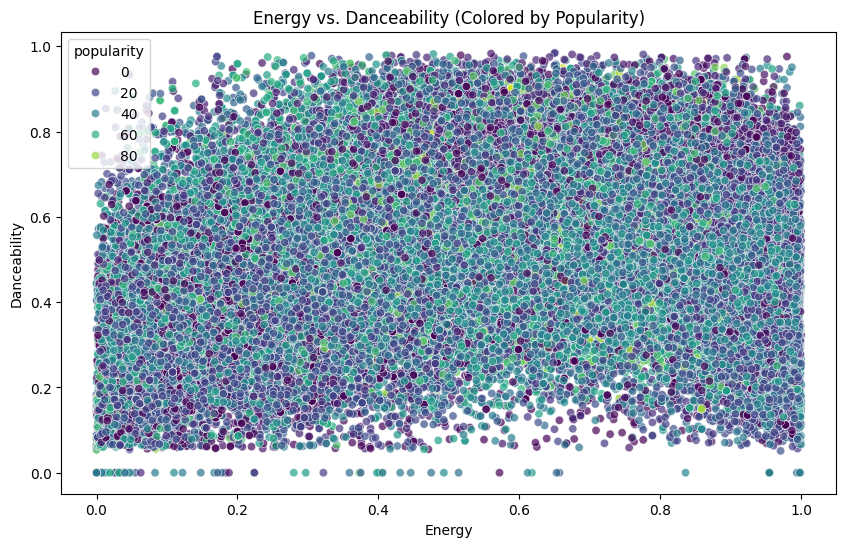

In [ ]:
# prompt: drive some interesting analysis

# ... (Your existing code)

# Further analysis exploring relationships between features and popularity

# 1. Popularity vs. Audio Features:
# Create scatter plots of popularity against several audio features.

audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=feature, y='popularity', data=df_tracks, alpha=0.5)
    plt.title(f'Popularity vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

# 2. Popularity Distribution Across Genres:
# Analyze how popularity is distributed among different genres.

genre_popularity_distribution = df_tracks.groupby('genre')['popularity'].describe()
print(genre_popularity_distribution.head(10))


# 3.  Impact of Release Year on Popularity:

plt.figure(figsize=(12, 6))
sns.regplot(x='release_year', y='popularity', data=df_tracks, scatter_kws={'alpha':0.3})
plt.title('Popularity vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()

# 4.  Combined Analysis (e.g., Popularity, Energy, and Danceability)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='danceability', hue='popularity', data=df_tracks, alpha=0.7, palette='viridis')  # Use a color palette
plt.title('Energy vs. Danceability (Colored by Popularity)')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# # Step 1: Filter data for the specified genres
# selected_genres = ['pop-film', 'k-pop', 'grunge', 'chill', 'sertanejo']
# filtered_data = df_tracks[df_tracks['genre'].isin(selected_genres)]

# # Step 2: Group by decade and genre, and calculate average popularity
# grouped_data = (
#     filtered_data.groupby(['decade', 'genre'])['popularity']
#     .mean()
#     .reset_index()
# )

# # Step 3: Plot using Seaborn
# plt.figure(figsize=(12, 6))
# sns.lineplot(
#     data=grouped_data,
#     x='decade',
#     y='popularity',
#     hue='genre',
#     marker='o',
#     palette='viridis'
# )

# # Customize the plot
# plt.xlabel('Decade')
# plt.ylabel('Average Popularity')
# plt.title('Trend of Average Popularity of Selected Genres Over Decades')
# plt.xticks(grouped_data['decade'].unique(), [f"{d}s" for d in grouped_data['decade'].unique()], rotation=45)
# plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(alpha=0.3)
# plt.tight_layout()

# plt.show()

# Merging Datasets

In [ ]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                 []  
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                 []  

[30141 rows x 5 columns]

In [ ]:
df_tracks.head(5)

id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       290479     False          52             5   
1            1       539229     False          45             5   
2            1       264200     False          39             5   
3            1       387413     False           0             6   
4            1       248956     False           0             1   

                  artists   album_type          album_name  ...  \
0                  Kölsch        album                1989  ...   
1                 Kiasmos        album             Kiasmos  ...   
2         Joris Delacroix        album       Night Visions  ...   
3  Pan-Pot;Anfisa Letyago       single  Confronted Remixes  ...   
4   Kollektiv Turmstrasse  compilation   10 Years Diynamic  ...   

  start_of_fade_out tempo_confidence  time_signature_confidence  \
0         275.90530            0.020                      1.000   
1         517.28253            0.678                      0.326   
2         259.04180            0.847                      0.457   
3         387.41360            0.882                      0.498   
4         239.63574            0.882                      1.000   

   key_confidence  mode_confidence  n_beats  n_bars           genre  \
0           0.500            0.525    705.0   234.0  minimal-techno   
1           0.410            0.589   1074.0   269.0  minimal-techno   
2           0.904            0.760    516.0   171.0  minimal-techno   
3           0.512            0.503    826.0   207.0  minimal-techno   
4           0.474            0.459    493.0   123.0  minimal-techno   

   duration_min  release_year  
0      4.841317        2017.0  
1      8.987150        2014.0  
2      4.403333        2018.0  
3      6.456883        2019.0  
4      4.149267        2016.0  

[5 rows x 36 columns]

In [ ]:
import pandas as pd

# Step 1: Explode the 'artists' column in df_tracks to handle multiple artists per track
df_tracks_exploded = df_tracks.explode('artists')

# Step 2: Merge df_tracks with df_artist on artist_name and name columns
merged_df = pd.merge(
    df_tracks_exploded,  # Tracks dataset with exploded artists
    df_artist,           # Artists dataset
    how='left',          # Perform a left join
    left_on='artists',  # Column in df_tracks_exploded
    right_on='name'        # Column in df_artist
)

# Step 3: Inspect the first few rows of the merged dataset
merged_df.head(6)

id_x                                      name_x  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
5  7E7POHU96XKXbiubARcPBD                                  Time Again   

   disc_number  duration_ms  explicit  popularity_x  track_number  \
0            1       290479     False            52             5   
1            1       539229     False            45             5   
2            1       264200     False            39             5   
3            1       387413     False             0             6   
4            1       248956     False             0             1   
5            1       501737     False            47             1   

                       artists   album_type          album_name  ... n_beats  \
0                       Kölsch        album                1989  ...   705.0   
1                      Kiasmos        album             Kiasmos  ...  1074.0   
2              Joris Delacroix        album       Night Visions  ...   516.0   
3       Pan-Pot;Anfisa Letyago       single  Confronted Remixes  ...   826.0   
4        Kollektiv Turmstrasse  compilation   10 Years Diynamic  ...   493.0   
5  Jan Blomqvist;Alar;Korolova       single          Time Again  ...  1025.0   

  n_bars           genre  duration_min  release_year                    id_y  \
0  234.0  minimal-techno      4.841317        2017.0  2D9Oe8R9UhbMvFAsMJpXj0   
1  269.0  minimal-techno      8.987150        2014.0  6X8lhZ7YaRUBlOsOYimlyD   
2  171.0  minimal-techno      4.403333        2018.0  3HRRzIZNQFus3xlUx2xKy1   
3  207.0  minimal-techno      6.456883        2019.0                     NaN   
4  123.0  minimal-techno      4.149267        2016.0  1oXiuCd5F0DcnmXH5KaM6N   
5  258.0  minimal-techno      8.362283        2021.0                     NaN   

                  name_y  popularity_y  followers  \
0                 Kölsch          51.0   218818.0   
1                Kiasmos          47.0   231613.0   
2        Joris Delacroix          44.0   100828.0   
3                    NaN           NaN        NaN   
4  Kollektiv Turmstrasse          45.0   245839.0   
5                    NaN           NaN        NaN   

                                              genres  
0  ['danish electronic', 'danish techno', 'deep e...  
1            ['electronica', 'icelandic electronic']  
2  ['deep euro house', 'minimal melodic techno', ...  
3                                                NaN  
4  ['german techno', 'hamburg electronic', 'minim...  
5                                                NaN  

[6 rows x 41 columns]

In [ ]:
df_tracks_exploded.shape

(109547, 36)

In [ ]:
df_tracks.shape

(109547, 36)

In [ ]:
merged_df.columns

Index(['id_x', 'name_x', 'disc_number', 'duration_ms', 'explicit',
       'popularity_x', 'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre',
       'duration_min', 'release_year', 'id_y', 'name_y', 'popularity_y',
       'followers', 'genres'],
      dtype='object')

In [ ]:
df_tracks.head(5)

id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       290479     False          52             5   
1            1       539229     False          45             5   
2            1       264200     False          39             5   
3            1       387413     False           0             6   
4            1       248956     False           0             1   

                  artists   album_type          album_name  ...  \
0                  Kölsch        album                1989  ...   
1                 Kiasmos        album             Kiasmos  ...   
2         Joris Delacroix        album       Night Visions  ...   
3  Pan-Pot;Anfisa Letyago       single  Confronted Remixes  ...   
4   Kollektiv Turmstrasse  compilation   10 Years Diynamic  ...   

  start_of_fade_out tempo_confidence  time_signature_confidence  \
0         275.90530            0.020                      1.000   
1         517.28253            0.678                      0.326   
2         259.04180            0.847                      0.457   
3         387.41360            0.882                      0.498   
4         239.63574            0.882                      1.000   

   key_confidence  mode_confidence  n_beats  n_bars           genre  \
0           0.500            0.525    705.0   234.0  minimal-techno   
1           0.410            0.589   1074.0   269.0  minimal-techno   
2           0.904            0.760    516.0   171.0  minimal-techno   
3           0.512            0.503    826.0   207.0  minimal-techno   
4           0.474            0.459    493.0   123.0  minimal-techno   

   duration_min  release_year  
0      4.841317        2017.0  
1      8.987150        2014.0  
2      4.403333        2018.0  
3      6.456883        2019.0  
4      4.149267        2016.0  

[5 rows x 36 columns]

In [ ]:
# Split the artists column and explode it
df_tracks_exploded = df_tracks.assign(artists=df_tracks['artists'].str.split(';')).explode('artists')

# Now you have one row per artist per track
df_tracks_exploded.head()


id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       290479     False          52             5   
1            1       539229     False          45             5   
2            1       264200     False          39             5   
3            1       387413     False           0             6   
3            1       387413     False           0             6   

           artists album_type          album_name  ... start_of_fade_out  \
0           Kölsch      album                1989  ...         275.90530   
1          Kiasmos      album             Kiasmos  ...         517.28253   
2  Joris Delacroix      album       Night Visions  ...         259.04180   
3          Pan-Pot     single  Confronted Remixes  ...         387.41360   
3   Anfisa Letyago     single  Confronted Remixes  ...         387.41360   

  tempo_confidence  time_signature_confidence  key_confidence  \
0            0.020                      1.000           0.500   
1            0.678                      0.326           0.410   
2            0.847                      0.457           0.904   
3            0.882                      0.498           0.512   
3            0.882                      0.498           0.512   

   mode_confidence  n_beats  n_bars           genre  duration_min  \
0            0.525    705.0   234.0  minimal-techno      4.841317   
1            0.589   1074.0   269.0  minimal-techno      8.987150   
2            0.760    516.0   171.0  minimal-techno      4.403333   
3            0.503    826.0   207.0  minimal-techno      6.456883   
3            0.503    826.0   207.0  minimal-techno      6.456883   

   release_year  
0        2017.0  
1        2014.0  
2        2018.0  
3        2019.0  
3        2019.0  

[5 rows x 36 columns]

In [ ]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                 []  
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                 []  

[30141 rows x 5 columns]

In [ ]:
# Merge the exploded dataframe with artist details
df_combined = pd.merge(df_tracks_exploded, df_artist[['name','popularity','followers']], left_on='artists', right_on='name', how='inner')

# Now the dataframe contains details about tracks and their corresponding artists
df_combined.head()


id                                      name_x  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   

   disc_number  duration_ms  explicit  popularity_x  track_number  \
0            1       290479     False            52             5   
1            1       539229     False            45             5   
2            1       264200     False            39             5   
3            1       387413     False             0             6   
4            1       387413     False             0             6   

           artists album_type          album_name  ... key_confidence  \
0           Kölsch      album                1989  ...          0.500   
1          Kiasmos      album             Kiasmos  ...          0.410   
2  Joris Delacroix      album       Night Visions  ...          0.904   
3          Pan-Pot     single  Confronted Remixes  ...          0.512   
4   Anfisa Letyago     single  Confronted Remixes  ...          0.512   

  mode_confidence  n_beats  n_bars           genre  duration_min  \
0           0.525    705.0   234.0  minimal-techno      4.841317   
1           0.589   1074.0   269.0  minimal-techno      8.987150   
2           0.760    516.0   171.0  minimal-techno      4.403333   
3           0.503    826.0   207.0  minimal-techno      6.456883   
4           0.503    826.0   207.0  minimal-techno      6.456883   

   release_year           name_y  popularity_y  followers  
0        2017.0           Kölsch          51.0   218818.0  
1        2014.0          Kiasmos          47.0   231613.0  
2        2018.0  Joris Delacroix          44.0   100828.0  
3        2019.0          Pan-Pot          36.0   209027.0  
4        2019.0   Anfisa Letyago          40.0    87586.0  

[5 rows x 39 columns]

In [ ]:
df_combined.columns

Index(['id', 'name_x', 'disc_number', 'duration_ms', 'explicit',
       'popularity_x', 'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre',
       'duration_min', 'release_year', 'name_y', 'popularity_y', 'followers'],
      dtype='object')

In [ ]:
# Calculate weighted popularity and followers
df_combined['Artists_popularity'] = df_combined.groupby('id')['popularity_y'].transform(lambda x: np.average(x, weights=x) if x.sum() != 0 else 0)
df_combined['Artists_followers'] = df_combined.groupby('id')['followers'].transform(lambda x: np.average(x, weights=x) if x.sum() != 0 else 0)

# Get all columns from df_tracks except 'artists'
track_columns = df_tracks.columns.difference(['artists'])

# Rename 'name' and 'popularity' in track_columns to avoid conflicts
track_columns = [col if col not in ['name', 'popularity'] else col + '_x' for col in track_columns]

# Select relevant columns for final DataFrame, including 'id' explicitly
aggregation_dict = {
    **{col: 'first' for col in track_columns},  # Include all track columns
    'Artists_popularity': 'first',
    'Artists_followers': 'first',
}

# If 'id' is in track_columns, remove it to avoid duplication
if 'id' in aggregation_dict:
    del aggregation_dict['id']

df_final = df_combined.groupby('id', as_index=False).agg(aggregation_dict)

df_final.head()

id  acousticness       album_name album_release_date  \
0  0000vdREvCVMxbQTkS888c      0.075700            Lolly         2022-09-23   
1  000CC8EParg64OmTxVnZ0p      0.406000  Glee Love Songs         2021-02-11   
2  000Iz0K615UepwSJ5z2RE5      0.001140                X         2014-05-30   
3  000RDCYioLteXcutOjeweY      0.058300       Teeje Week         2018-02-12   
4  000qpdoc97IMTBvF8gwcpy      0.000964             Zeit         2001-10-08   

  album_release_date_precision  album_total_tracks album_type  danceability  \
0                          day                   1     single         0.910   
1                          day                 100      album         0.269   
2                          day                  11      album         0.686   
3                          day                   1     single         0.679   
4                          day                  11      album         0.519   

   disc_number  duration_min  ...  speechiness  start_of_fade_out    tempo  \
0            1      2.678750  ...       0.1990          154.11664  104.042   
1            1      5.382217  ...       0.0366          313.21976  178.174   
2            1      8.589333  ...       0.0462          474.23273  119.997   
3            1      3.170050  ...       0.1900          183.53633  161.721   
4            1      5.520667  ...       0.0291          321.92145  129.971   

   tempo_confidence time_signature  time_signature_confidence  track_number  \
0             0.578              4                      1.000             1   
1             0.030              4                      0.659            10   
2             0.832              4                      0.996             5   
3             0.103              4                      1.000             1   
4             0.622              4                      1.000             9   

   valence  Artists_popularity  Artists_followers  
0    0.432           45.000000       1.682600e+04  
1    0.341           67.000000       1.517867e+06  
2    0.108           52.880000       1.098065e+06  
3    0.839           57.495575       2.791233e+06  
4    0.234           62.000000       1.172268e+06  

[5 rows x 37 columns]

In [ ]:
df_final.loc[df_final["id"]=="0000vdREvCVMxbQTkS888c"]

id  acousticness album_name album_release_date  \
0  0000vdREvCVMxbQTkS888c        0.0757      Lolly         2022-09-23   

  album_release_date_precision  album_total_tracks album_type  danceability  \
0                          day                   1     single          0.91   

   disc_number  duration_min  ...  speechiness  start_of_fade_out    tempo  \
0            1       2.67875  ...        0.199          154.11664  104.042   

   tempo_confidence time_signature  time_signature_confidence  track_number  \
0             0.578              4                        1.0             1   

   valence  Artists_popularity  Artists_followers  
0    0.432                45.0            16826.0  

[1 rows x 37 columns]

In [ ]:
df_tracks.head()

id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       290479     False          52             5   
1            1       539229     False          45             5   
2            1       264200     False          39             5   
3            1       387413     False           0             6   
4            1       248956     False           0             1   

                  artists   album_type          album_name  ...  \
0                  Kölsch        album                1989  ...   
1                 Kiasmos        album             Kiasmos  ...   
2         Joris Delacroix        album       Night Visions  ...   
3  Pan-Pot;Anfisa Letyago       single  Confronted Remixes  ...   
4   Kollektiv Turmstrasse  compilation   10 Years Diynamic  ...   

  start_of_fade_out tempo_confidence  time_signature_confidence  \
0         275.90530            0.020                      1.000   
1         517.28253            0.678                      0.326   
2         259.04180            0.847                      0.457   
3         387.41360            0.882                      0.498   
4         239.63574            0.882                      1.000   

   key_confidence  mode_confidence  n_beats  n_bars           genre  \
0           0.500            0.525    705.0   234.0  minimal-techno   
1           0.410            0.589   1074.0   269.0  minimal-techno   
2           0.904            0.760    516.0   171.0  minimal-techno   
3           0.512            0.503    826.0   207.0  minimal-techno   
4           0.474            0.459    493.0   123.0  minimal-techno   

   duration_min  release_year  
0      4.841317        2017.0  
1      8.987150        2014.0  
2      4.403333        2018.0  
3      6.456883        2019.0  
4      4.149267        2016.0  

[5 rows x 36 columns]

In [ ]:
df_tracks.iloc[43417]

id                              0000vdREvCVMxbQTkS888c
name                                             Lolly
disc_number                                          1
duration_ms                                     160725
explicit                                          True
popularity                                          35
track_number                                         1
artists                                           Rill
album_type                                      single
album_name                                       Lolly
album_release_date                 2022-09-23 00:00:00
album_release_date_precision                       day
album_total_tracks                                   1
danceability                                      0.91
energy                                           0.374
key                                                  8
loudness                                        -9.844
mode                                                 0
speechiness                                      0.199
acousticness                                    0.0757
instrumentalness                               0.00301
liveness                                         0.154
valence                                          0.432
tempo                                          104.042
features_duration_ms                            160726
time_signature                                       4
start_of_fade_out                            154.11664
tempo_confidence                                 0.578
time_signature_confidence                          1.0
key_confidence                                   0.685
mode_confidence                                  0.583
n_beats                                          276.0
n_bars                                            67.0
genre                                           german
duration_min                                   2.67875
release_year                                    2022.0
Name: 43417, dtype: object

In [ ]:
df_artist.loc[df_artist["name"]=="Pan-Pot"]

id     name  popularity  followers  \
8627  6OQOvP7RAdmAKVXXQqD0Se  Pan-Pot        36.0   209027.0   

                                                 genres  
8627  ['german techno', 'minimal techno', 'raw techno']

In [ ]:
df_artist.loc[df_artist["name"]=="Anfisa Letyago"]

id            name  popularity  followers genres
26598  7icoOm5fKKPo49jVxoj1Cq  Anfisa Letyago        40.0    87586.0     []

# Analysis of Combined Dataset

In [ ]:
df_final.columns

Index(['id', 'acousticness', 'album_name', 'album_release_date',
       'album_release_date_precision', 'album_total_tracks', 'album_type',
       'danceability', 'disc_number', 'duration_min', 'duration_ms', 'energy',
       'explicit', 'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'popularity_x', 'release_year',
       'speechiness', 'start_of_fade_out', 'tempo', 'tempo_confidence',
       'time_signature', 'time_signature_confidence', 'track_number',
       'valence', 'Artists_popularity', 'Artists_followers'],
      dtype='object')

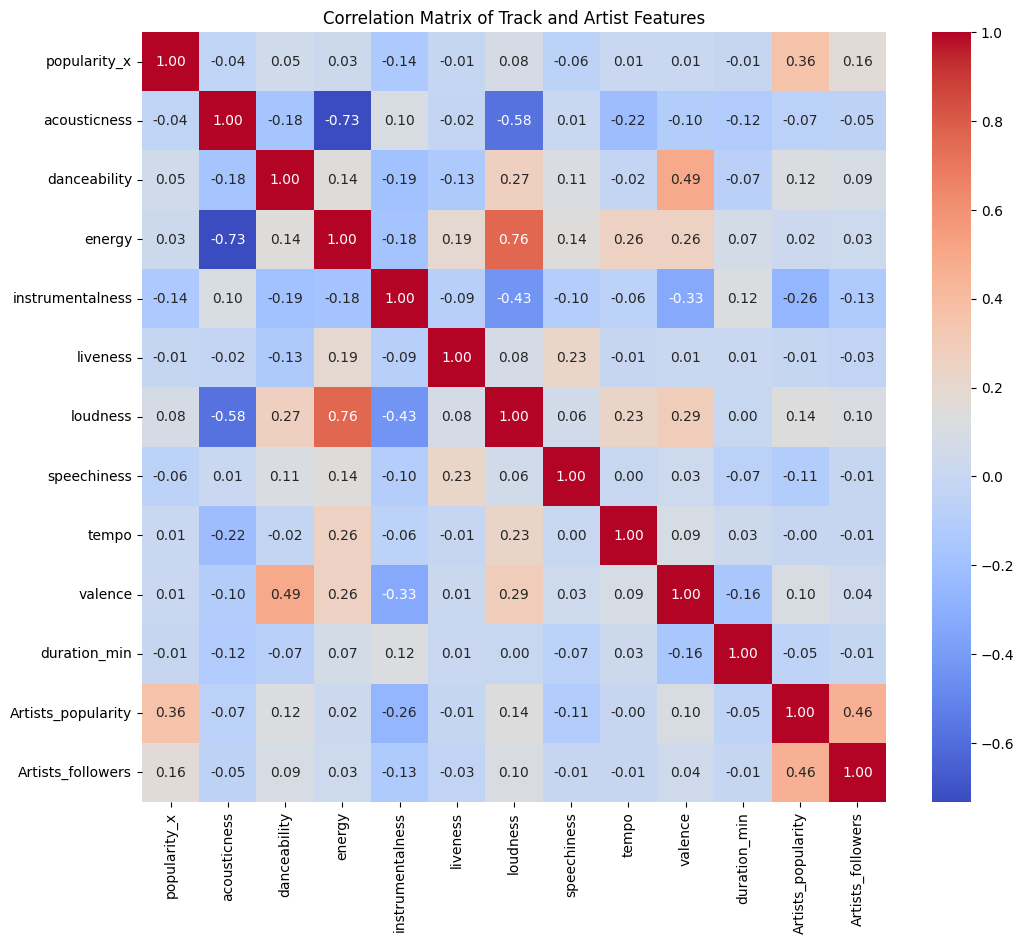

In [ ]:
# prompt: Make a correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is your combined dataframe as shown in the previous code.

# Select the numerical columns for correlation analysis
numerical_cols = ['popularity_x', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                  'loudness', 'speechiness', 'tempo', 'valence', 'duration_min', 'Artists_popularity', 'Artists_followers']

# Calculate the correlation matrix
correlation_matrix = df_final[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Track and Artist Features')
plt.show()

In [ ]:
# Rename the column
df_final.rename(columns={'popularity_x': 'track_popularity'}, inplace=True)

# Verify the change
print(df_final.columns)


Index(['id', 'acousticness', 'album_name', 'album_release_date',
       'album_release_date_precision', 'album_total_tracks', 'album_type',
       'danceability', 'disc_number', 'duration_min', 'duration_ms', 'energy',
       'explicit', 'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'track_popularity', 'release_year',
       'speechiness', 'start_of_fade_out', 'tempo', 'tempo_confidence',
       'time_signature', 'time_signature_confidence', 'track_number',
       'valence', 'Artists_popularity', 'Artists_followers'],
      dtype='object')


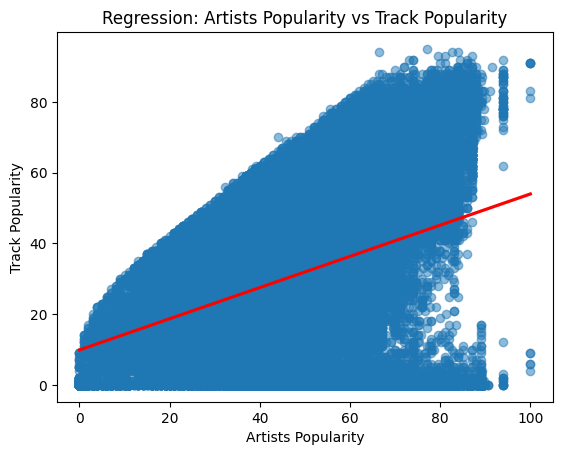

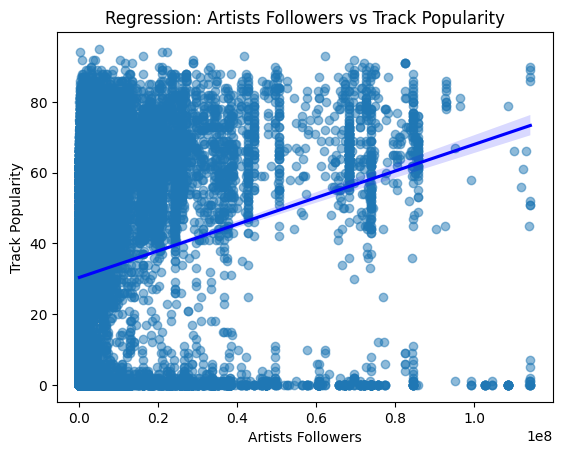

In [ ]:
 # Regression plot for Artists Popularity vs Track Popularity
sns.regplot(x='Artists_popularity', y='track_popularity', data=df_final, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression: Artists Popularity vs Track Popularity')
plt.xlabel('Artists Popularity')
plt.ylabel('Track Popularity')
plt.show()

# Regression plot for Artists Followers vs Track Popularity
sns.regplot(x='Artists_followers', y='track_popularity', data=df_final, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Regression: Artists Followers vs Track Popularity')
plt.xlabel('Artists Followers')
plt.ylabel('Track Popularity')
plt.show()


In [ ]:
# Define genre mapping dictionary
genre_mapping = {
    # Electronic/Dance
    'club': 'Electronic/Dance', 'minimal-techno': 'Electronic/Dance', 'drum-and-bass': 'Electronic/Dance',
    'idm': 'Electronic/Dance', 'dubstep': 'Electronic/Dance', 'progressive-house': 'Electronic/Dance',
    'chicago-house': 'Electronic/Dance', 'electronic': 'Electronic/Dance', 'trance': 'Electronic/Dance',
    'edm': 'Electronic/Dance', 'deep-house': 'Electronic/Dance', 'techno': 'Electronic/Dance',
    'garage': 'Electronic/Dance', 'breakbeat': 'Electronic/Dance',

    # Pop
    'pop': 'Pop', 'indie-pop': 'Pop', 'j-pop': 'Pop', 'k-pop': 'Pop',
    'mandopop': 'Pop', 'cantopop': 'Pop', 'british': 'Pop',
    'power-pop': 'Pop', 'pop-film': 'Pop',

    # Rock/Alternative
    'punk-rock': 'Rock/Alternative', 'emo': 'Rock/Alternative',
    'grunge': 'Rock/Alternative', 'industrial': 'Rock/Alternative',
    'alternative': 'Rock/Alternative', 'psych-rock': 'Rock/Alternative',
    'alt-rock': 'Rock/Alternative', 'hard-rock': 'Rock/Alternative',
    'rock': 'Rock/Alternative', 'rockabilly': 'Rock/Alternative',
    'metal': 'Rock/Alternative', 'heavy-metal': 'Rock/Alternative',
    'black-metal': 'Rock/Alternative', 'death-metal': 'Rock/Alternative',
    'hardcore': 'Rock/Alternative', 'metalcore': 'Rock/Alternative',
    'rock-n-roll': 'Rock/Alternative', 'goth': 'Rock/Alternative',

    # Hip-Hop/Rap
    'hip-hop': 'Hip-Hop/Rap', 'j-idol': 'Hip-Hop/Rap', 'rap': 'Hip-Hop/Rap',
    'reggaeton': 'Hip-Hop/Rap', 'trip-hop': 'Hip-Hop/Rap', 'dancehall': 'Hip-Hop/Rap',

    # Classical/Instrumental
    'classical': 'Classical/Instrumental', 'opera': 'Classical/Instrumental',
    'piano': 'Classical/Instrumental', 'ambient': 'Classical/Instrumental',
    'songwriter': 'Classical/Instrumental', 'acoustic': 'Classical/Instrumental',

    # Jazz/Blues/Soul
    'jazz': 'Jazz/Blues/Soul', 'blues': 'Jazz/Blues/Soul',
    'soul': 'Jazz/Blues/Soul', 'funk': 'Jazz/Blues/Soul',
    'gospel': 'Jazz/Blues/Soul',

    # Country/Folk/Traditional
    'country': 'Country/Folk/Traditional', 'bluegrass': 'Country/Folk/Traditional',
    'folk': 'Country/Folk/Traditional', 'honky-tonk': 'Country/Folk/Traditional',
    'brazil': 'Country/Folk/Traditional', 'pagode': 'Country/Folk/Traditional',
    'mpb': 'Country/Folk/Traditional', 'samba': 'Country/Folk/Traditional',
    'sertanejo': 'Country/Folk/Traditional', 'afrobeat': 'Country/Folk/Traditional',

    # Latin/World
    'latin': 'Latin/World', 'latino': 'Latin/World', 'spanish': 'Latin/World',
    'brazil': 'Latin/World', 'forro': 'Latin/World', 'tango': 'Latin/World',
    'salsa': 'Latin/World', 'world-music': 'Latin/World',

    # Children/Family
    'kids': 'Children/Family', 'children': 'Children/Family',
    'disney': 'Children/Family', 'comedy': 'Children/Family',
    'happy': 'Children/Family',

    # Asian Music
    'j-pop': 'Asian Music', 'j-rock': 'Asian Music', 'j-dance': 'Asian Music',
    'j-idol': 'Asian Music', 'anime': 'Asian Music', 'iranian': 'Asian Music',
    'indian': 'Asian Music', 'malay': 'Asian Music', 'turkish': 'Asian Music',

    # Reggae/Dub
    'reggae': 'Reggae/Dub', 'dub': 'Reggae/Dub', 'dancehall': 'Reggae/Dub',

    # Chill/Relaxation
    'chill': 'Chill/Relaxation', 'study': 'Chill/Relaxation',
    'sleep': 'Chill/Relaxation', 'new-age': 'Chill/Relaxation',
    'ambient': 'Chill/Relaxation',

    # Other/Niche
    'party': 'Other/Niche', 'romance': 'Other/Niche',
    'show-tunes': 'Other/Niche', 'detroit-techno': 'Other/Niche',
    'hardstyle': 'Other/Niche', 'psych-rock': 'Other/Niche',
    'industrial': 'Other/Niche', 'german': 'Other/Niche',
    'french': 'Other/Niche', 'swedish': 'Other/Niche',
    'comedy': 'Other/Niche'
}

# Apply the mapping to your DataFrame
df_final['broad_genre'] = df_final['genre'].map(genre_mapping)


In [ ]:
df_final["genre"].unique()

array(['german', 'club', 'minimal-techno', 'hip-hop', 'comedy', 'soul',
       'punk-rock', 'bluegrass', 'happy', 'drum-and-bass', 'idm',
       'alternative', 'emo', 'honky-tonk', 'industrial', 'j-dance',
       'grindcore', 'french', 'world-music', 'hard-rock', 'forro',
       'j-pop', 'children', 'j-rock', 'power-pop', 'pagode', 'jazz',
       'romance', 'study', 'funk', 'afrobeat', 'black-metal', 'grunge',
       'opera', 'show-tunes', 'heavy-metal', 'k-pop', 'progressive-house',
       'acoustic', 'anime', 'ambient', 'dubstep', 'iranian', 'songwriter',
       'synth-pop', 'chicago-house', 'kids', 'disco', 'blues', 'pop-film',
       'gospel', 'brazil', 'mandopop', 'swedish', 'tango', 'reggae',
       'piano', 'spanish', 'turkish', 'salsa', 'samba', 'electronic',
       'goth', 'dance', 'malay', 'death-metal', 'trance', 'indian',
       'country', 'hardstyle', 'mpb', 'electro', 'indie-pop', 'disney',
       'chill', 'j-idol', 'psych-rock', 'punk', 'guitar', 'dub', 'groove',
       

In [ ]:
df_final["broad_genre"].unique()

array(['Other/Niche', 'Electronic/Dance', 'Hip-Hop/Rap',
       'Jazz/Blues/Soul', 'Rock/Alternative', 'Country/Folk/Traditional',
       'Children/Family', 'Asian Music', nan, 'Latin/World', 'Pop',
       'Chill/Relaxation', 'Classical/Instrumental', 'Reggae/Dub'],
      dtype=object)

# New Section

In [ ]:
df_tracks.shape

(109547, 36)

In [ ]:
df_tracks["id"].nunique()

89562

In [ ]:
df_final.columns

Index(['id', 'acousticness', 'album_name', 'album_release_date',
       'album_release_date_precision', 'album_total_tracks', 'album_type',
       'danceability', 'disc_number', 'duration_min', 'duration_ms', 'energy',
       'explicit', 'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'track_popularity', 'release_year',
       'speechiness', 'start_of_fade_out', 'tempo', 'tempo_confidence',
       'time_signature', 'time_signature_confidence', 'track_number',
       'valence', 'Artists_popularity', 'Artists_followers', 'broad_genre'],
      dtype='object')

In [ ]:
# prompt: Merge Artists column from the tracks dataset to the df_final

# Assuming df_final and df_tracks are already loaded and processed as in your provided code.

# Merge the 'Artists' column from df_tracks to df_final based on the 'id' column.
# Since 'artists' is a list in df_tracks, and you likely want to add the list to the df_final, use a left merge and handle the merging of lists accordingly.

df_final = pd.merge(df_final, df_tracks[['id', 'artists']], on='id', how='left')

# Display the first few rows of the merged DataFrame to verify.
df_final.head()

id  acousticness       album_name album_release_date  \
0  0000vdREvCVMxbQTkS888c      0.075700            Lolly         2022-09-23   
1  000CC8EParg64OmTxVnZ0p      0.406000  Glee Love Songs         2021-02-11   
2  000Iz0K615UepwSJ5z2RE5      0.001140                X         2014-05-30   
3  000RDCYioLteXcutOjeweY      0.058300       Teeje Week         2018-02-12   
4  000qpdoc97IMTBvF8gwcpy      0.000964             Zeit         2001-10-08   

  album_release_date_precision  album_total_tracks album_type  danceability  \
0                          day                   1     single         0.910   
1                          day                 100      album         0.269   
2                          day                  11      album         0.686   
3                          day                   1     single         0.679   
4                          day                  11      album         0.519   

   disc_number  duration_min  ...    tempo  tempo_confidence  time_signature  \
0            1      2.678750  ...  104.042             0.578               4   
1            1      5.382217  ...  178.174             0.030               4   
2            1      8.589333  ...  119.997             0.832               4   
3            1      3.170050  ...  161.721             0.103               4   
4            1      5.520667  ...  129.971             0.622               4   

   time_signature_confidence track_number  valence  Artists_popularity  \
0                      1.000            1    0.432           45.000000   
1                      0.659           10    0.341           67.000000   
2                      0.996            5    0.108           52.880000   
3                      1.000            1    0.839           57.495575   
4                      1.000            9    0.234           62.000000   

   Artists_followers       broad_genre                    artists  
0       1.682600e+04       Other/Niche                       Rill  
1       1.517867e+06  Electronic/Dance                  Glee Cast  
2       1.098065e+06  Electronic/Dance   Paul Kalkbrenner;Pig&Dan  
3       2.791233e+06       Hip-Hop/Rap  Jordan Sandhu;Bunty Bains  
4       1.172268e+06  Electronic/Dance           Paul Kalkbrenner  

[5 rows x 39 columns]

In [ ]:
# Assuming your 'artists' column contains a string of artist names separated by semicolons (;)
df_final['is_collaboration'] = df_final['artists'].apply(lambda x: 1 if ';' in x else 0)

In [ ]:
df_final.loc[df_final["is_collaboration"]==1]

id  acousticness              album_name  \
2       000Iz0K615UepwSJ5z2RE5       0.00114                       X   
3       000RDCYioLteXcutOjeweY       0.05830              Teeje Week   
6       001APMDOl3qtx1526T11n1       0.31600                 New RnB   
7       001APMDOl3qtx1526T11n1       0.31600                 New RnB   
12      002uYDBLOvJz21C4FuArDS       0.00510       Find Me (Remixes)   
...                        ...           ...                     ...   
109523  7zubR9uYAWjb5KPZTMm85e       0.12700  El perreo es el futuro   
109524  7zubR9uYAWjb5KPZTMm85e       0.12700  El perreo es el futuro   
109525  7zubR9uYAWjb5KPZTMm85e       0.12700  El perreo es el futuro   
109538  7zx2Nb2BTMOFelkvb4nNPB       0.00486         We Are (Part 2)   
109540  7zxHiMmVLt4LGWpOMqOpUh       0.69800          Bangalore Days   

       album_release_date album_release_date_precision  album_total_tracks  \
2              2014-05-30                          day                  11   
3              2018-02-12                          day                   1   
6              2022-10-21                          day                  38   
7              2022-10-21                          day                  38   
12             2016-12-09                          day                   5   
...                   ...                          ...                 ...   
109523         2022-10-21                          day                  31   
109524         2022-10-21                          day                  31   
109525         2022-10-21                          day                  31   
109538         2017-03-24                          day                  10   
109540         2014-05-12                          day                   7   

         album_type  danceability  disc_number  duration_min  ...  \
2             album         0.686            1      8.589333  ...   
3            single         0.679            1      3.170050  ...   
6       compilation         0.613            1      2.938667  ...   
7       compilation         0.613            1      2.938667  ...   
12           single         0.415            1      4.205700  ...   
...             ...           ...          ...           ...  ...   
109523  compilation         0.759            1      4.394433  ...   
109524  compilation         0.759            1      4.394433  ...   
109525  compilation         0.759            1      4.394433  ...   
109538        album         0.529            1      3.109783  ...   
109540        album         0.766            1      5.419267  ...   

        tempo_confidence  time_signature  time_signature_confidence  \
2                  0.832               4                      0.996   
3                  0.103               4                      1.000   
6                  0.049               4                      0.945   
7                  0.049               4                      0.945   
12                 0.404               4                      1.000   
...                  ...             ...                        ...   
109523             0.659               4                      0.870   
109524             0.659               4                      0.870   
109525             0.659               4                      0.870   
109538             0.492               4                      0.863   
109540             0.736               4                      1.000   

        track_number valence  Artists_popularity  Artists_followers  \
2                  5   0.108           52.880000       1.098065e+06   
3                  1   0.839           57.495575       2.791233e+06   
6                 36   0.406           60.210084       1.615219e+06   
7                 36   0.406           60.210084       1.615219e+06   
12                 2   0.146           62.984000       3.503565e+06   
...              ...     ...                 ...                ...   
109523            22   0.560           84.04761

In [ ]:
# 1. Explode the 'artists' column to have one row per artist per track
df_exploded = df_final.assign(artists=df_final['artists'].str.split(';')).explode('artists')

# 2. Group by artist and count total tracks
artist_total_tracks = df_exploded.groupby('artists')['id'].count().reset_index()
artist_total_tracks.rename(columns={'id': 'artist_total_tracks'}, inplace=True)

# 3. Merge total tracks back into the exploded DataFrame
df_exploded = pd.merge(df_exploded, artist_total_tracks, on='artists', how='left')

# 4. Group by original track ID and sum artist total tracks
track_artist_total_tracks = df_exploded.groupby('id')['artist_total_tracks'].sum().reset_index()
track_artist_total_tracks.rename(columns={'artist_total_tracks': 'total_tracks_all_artists'}, inplace=True)

# 5. Merge the calculated feature back into the original DataFrame
df_final = pd.merge(df_final, track_artist_total_tracks, on='id', how='left')

In [ ]:
df_final.genre.unique()

array(['german', 'club', 'minimal-techno', 'hip-hop', 'comedy', 'soul',
       'punk-rock', 'bluegrass', 'happy', 'drum-and-bass', 'idm',
       'alternative', 'emo', 'honky-tonk', 'industrial', 'j-dance',
       'grindcore', 'french', 'world-music', 'hard-rock', 'forro',
       'j-pop', 'children', 'j-rock', 'power-pop', 'pagode', 'jazz',
       'romance', 'study', 'funk', 'afrobeat', 'black-metal', 'grunge',
       'opera', 'show-tunes', 'heavy-metal', 'k-pop', 'progressive-house',
       'acoustic', 'anime', 'ambient', 'dubstep', 'iranian', 'songwriter',
       'synth-pop', 'chicago-house', 'kids', 'disco', 'blues', 'pop-film',
       'gospel', 'brazil', 'mandopop', 'swedish', 'tango', 'reggae',
       'piano', 'spanish', 'turkish', 'salsa', 'samba', 'electronic',
       'goth', 'dance', 'malay', 'death-metal', 'trance', 'indian',
       'country', 'hardstyle', 'mpb', 'electro', 'indie-pop', 'disney',
       'chill', 'j-idol', 'psych-rock', 'punk', 'guitar', 'dub', 'groove',
       

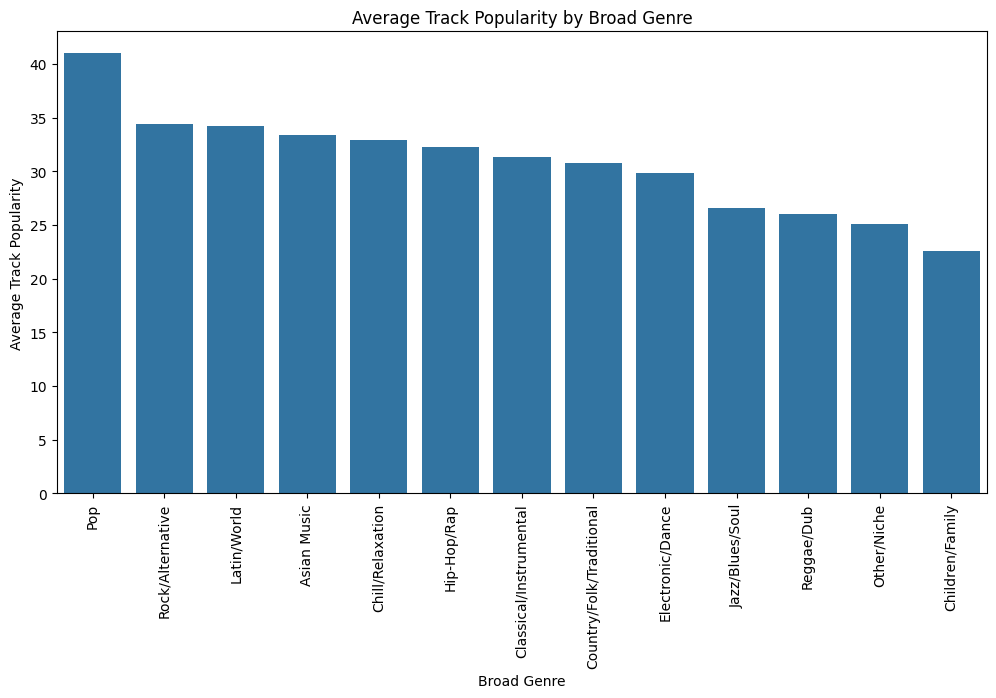

In [ ]:
# prompt: broad_genre wise populariy

# Group by broad genre and calculate the average popularity
broad_genre_popularity = df_final.groupby('broad_genre')['track_popularity'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=broad_genre_popularity.index, y=broad_genre_popularity.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Broad Genre')
plt.ylabel('Average Track Popularity')
plt.title('Average Track Popularity by Broad Genre')
plt.show()

<ipython-input-73-614992e50a2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='broad_genre', y='track_popularity', data=df_final, palette="Set3") # Use a categorical palette


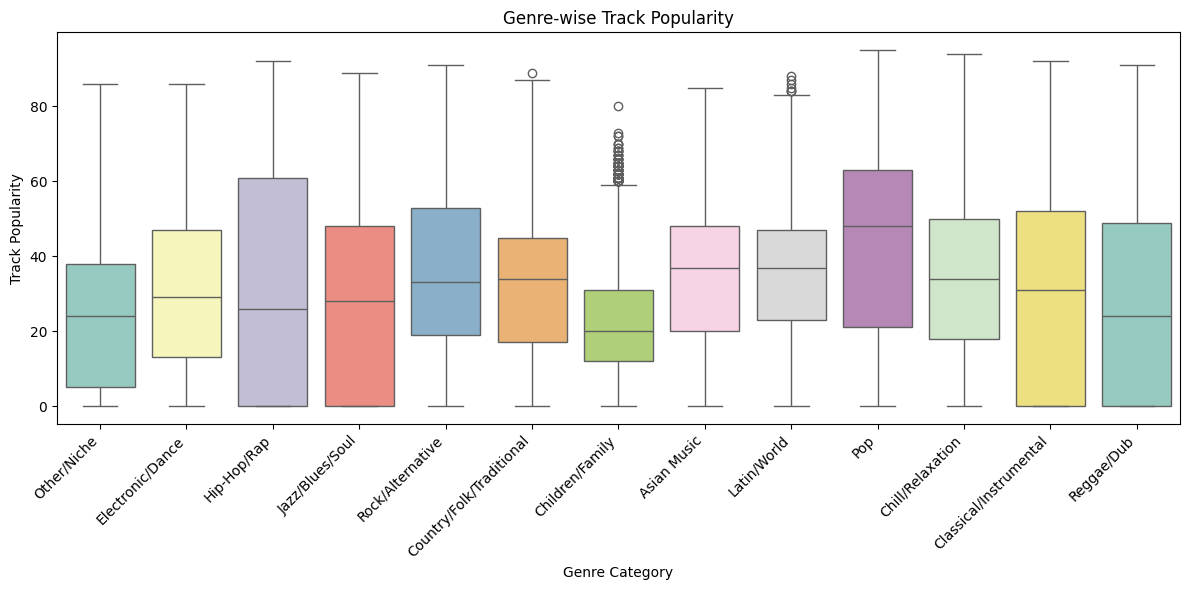

In [ ]:
# prompt: Check Genre-wise Popularity metrics for tracks.  Use SNS and give each genre a different color

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is your combined dataframe and 'genre_category' is created

plt.figure(figsize=(12, 6))
sns.boxplot(x='broad_genre', y='track_popularity', data=df_final, palette="Set3") # Use a categorical palette
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre Category")
plt.ylabel("Track Popularity")
plt.title("Genre-wise Track Popularity")
plt.tight_layout()
plt.show()

# Time Series Analysis

In [ ]:
def load_npy(filename):
    return np.load(filename)

In [ ]:
dir_path = '/content/drive/MyDrive/DM2/dataset/time_series/'
len_threshold = 1280

In [ ]:
import os

In [ ]:
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre
    ts = load_npy(dir_path + file)

    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation
        ts = np.append(ts, pad)

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)

In [ ]:
TimeSeriesDataX=X
TimeSeriesDatay=y

In [ ]:
X.shape, y.shape

((7648, 1, 1280), (7648,))

In [ ]:
np.unique(y)

array(['emo', 'emo (1)', 'folk', 'folk (1)', 'goth', 'happy',
       'heavy-metal', 'honky-tonk', 'j-idol', 'kids', 'minimal-techno',
       'mpb', 'mpb (1)', 'new-age', 'new-age (1)', 'opera', 'piano',
       'piano (1)', 'progressive-house', 'salsa', 'sertanejo',
       'sertanejo (1)', 'sleep', 'songwriter', 'synth-pop', 'world-music'],
      dtype='<U17')

In [ ]:
df_tracks["genre"].unique()

array(['minimal-techno', 'hip-hop', 'honky-tonk', 'house', 'idm',
       'indian', 'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance',
       'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'alternative',
       'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'sleep', 'songwriter', 'soul', 'spanish', 'study',
       'swedish', 'synth-pop', 'tango', 'techno', 'trance', 'trip-hop',
       'turkish', 'world-music', 'edm', 'electro', 'electronic', 'emo',
       'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel',
       'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'acoustic',
       'afrobeat', 'alt-rock', 'happy', 'hard-rock', 'hardcore',
       'hardstyle', 'heavy-metal', 'mandopop', 'metal', 'metalcore',
       'pop-film', 'pop', 'power-pop', 'progressive-house', 'psych-rock',
       'punk-rock', 'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll',
       'rock', 'rockabilly', 'romance', 'sad', 'salsa', 'samba',
       'sert

### Converting into Pandas Dataframe

In [ ]:

# 1. Convert X to DataFrame
# Assuming X is a 3D array (num_samples, 1, num_features)
# Reshape X to 2D if necessary
X_2d = X.reshape(X.shape[0], X.shape[2])
df_X = pd.DataFrame(X_2d)
df_X['id'] = ids  # Add track IDs as a column

# 2. Convert y to DataFrame
df_y = pd.DataFrame({'id': ids, 'genre': y})

# 3. Optionally merge df_X and df_y
df_time = pd.merge(df_X, df_y, on='id')

# Display the DataFrames
print("df_X:")
display(df_X.head())  # Use display() for better formatting in Colab
print("\ndf_y:")
display(df_y.head())
print("\ndf_combined:")
display(df_time.head())

df_X:


0            1            2            3            4  \
0  3072.768429  3098.137562  3127.474369  3095.008482  3712.321045   
1  3340.824259  3457.930915  3552.894993  3668.331816  3502.960815   
2  1818.807396  1846.170661  1966.209268  1934.102771  1888.684511   
3  2122.785148  2245.341454  2323.208305  2281.941052  2257.485409   
4  2250.805736  2205.054568  2281.626535  2346.646812  2349.701495   

             5            6            7            8            9  ...  \
0  3449.950344  2647.363568  2234.473459  2335.339691  2430.087976  ...   
1  3177.368324  3085.153427  3033.716870  3042.894558  3187.760982  ...   
2  1994.169287  2143.801603  2239.960053  2138.987849  2548.700612  ...   
3  2213.720598  2206.991005  2327.754085  2284.647221  2320.261019  ...   
4  2336.480797  2184.853419  2066.543462  2107.220355  2205.124328  ...   

          1271         1272         1273         1274         1275  \
0  2339.628891  2329.762069  2427.024426  2202.797369  2603.873047   
1  1300.618559  1174.286165  1124.563194  1215.093207  1248.890915   
2  1674.707042  1376.555353  1641.913259  2353.317298  3449.253140   
3  3851.502388  4049.589684  3975.647508  3994.929270  4366.577582   
4  2998.323975  3213.502337  3148.426371  3099.103426  3034.964913   

          1276         1277         1278         1279                      id  
0  2653.106042  2592.900993  2763.512610  2742.837648  512rk6iIuzhzOtBGHTUVUS  
1  1254.067391  1241.926789  1232.992284  1276.787679  3hWfKBt3n7j1xqIy6LA5ve  
2  3429.471893  2628.606390  2220.877092  1960.415952  5N5k9nd479b1xpDZ4usjrg  
3  4077.340537  3775.721055  3738.064461  3767.146941  2UM5jlU2iLXDEAtzIfa1m0  
4  2608.477179  2464.920238  2540.528979  2395.488665  1PfLmjg83VihYZJtVQk1bX  

[5 rows x 1281 columns]


df_y:


id              genre
0  512rk6iIuzhzOtBGHTUVUS  progressive-house
1  3hWfKBt3n7j1xqIy6LA5ve  progressive-house
2  5N5k9nd479b1xpDZ4usjrg  progressive-house
3  2UM5jlU2iLXDEAtzIfa1m0  progressive-house
4  1PfLmjg83VihYZJtVQk1bX  progressive-house


df_combined:


0            1            2            3            4  \
0  3072.768429  3098.137562  3127.474369  3095.008482  3712.321045   
1  3340.824259  3457.930915  3552.894993  3668.331816  3502.960815   
2  1818.807396  1846.170661  1966.209268  1934.102771  1888.684511   
3  2122.785148  2245.341454  2323.208305  2281.941052  2257.485409   
4  2250.805736  2205.054568  2281.626535  2346.646812  2349.701495   

             5            6            7            8            9  ...  \
0  3449.950344  2647.363568  2234.473459  2335.339691  2430.087976  ...   
1  3177.368324  3085.153427  3033.716870  3042.894558  3187.760982  ...   
2  1994.169287  2143.801603  2239.960053  2138.987849  2548.700612  ...   
3  2213.720598  2206.991005  2327.754085  2284.647221  2320.261019  ...   
4  2336.480797  2184.853419  2066.543462  2107.220355  2205.124328  ...   

          1272         1273         1274         1275         1276  \
0  2329.762069  2427.024426  2202.797369  2603.873047  2653.106042   
1  1174.286165  1124.563194  1215.093207  1248.890915  1254.067391   
2  1376.555353  1641.913259  2353.317298  3449.253140  3429.471893   
3  4049.589684  3975.647508  3994.929270  4366.577582  4077.340537   
4  3213.502337  3148.426371  3099.103426  3034.964913  2608.477179   

          1277         1278         1279                      id  \
0  2592.900993  2763.512610  2742.837648  512rk6iIuzhzOtBGHTUVUS   
1  1241.926789  1232.992284  1276.787679  3hWfKBt3n7j1xqIy6LA5ve   
2  2628.606390  2220.877092  1960.415952  5N5k9nd479b1xpDZ4usjrg   
3  3775.721055  3738.064461  3767.146941  2UM5jlU2iLXDEAtzIfa1m0   
4  2464.920238  2540.528979  2395.488665  1PfLmjg83VihYZJtVQk1bX   

               genre  
0  progressive-house  
1  progressive-house  
2  progressive-house  
3  progressive-house  
4  progressive-house  

[5 rows x 1282 columns]

In [ ]:
# prompt: Delete all duplicate rows from df_combined

# Drop duplicate rows based on all columns
df_time = df_time.drop_duplicates()

In [ ]:
# prompt: Combine Track dataset and add Track name into time series. Only Track name.

# Merge the track names into the time series data
df_time = pd.merge(df_time, df_final[['id', 'name_x']], on='id', how='left')

# Display the updated DataFrame
print("\ndf_time with track names:")
display(df_time.head())


df_time with track names:


0            1            2            3            4  \
0  3072.768429  3098.137562  3127.474369  3095.008482  3712.321045   
1  3072.768429  3098.137562  3127.474369  3095.008482  3712.321045   
2  3340.824259  3457.930915  3552.894993  3668.331816  3502.960815   
3  3340.824259  3457.930915  3552.894993  3668.331816  3502.960815   
4  3340.824259  3457.930915  3552.894993  3668.331816  3502.960815   

             5            6            7            8            9  ...  \
0  3449.950344  2647.363568  2234.473459  2335.339691  2430.087976  ...   
1  3449.950344  2647.363568  2234.473459  2335.339691  2430.087976  ...   
2  3177.368324  3085.153427  3033.716870  3042.894558  3187.760982  ...   
3  3177.368324  3085.153427  3033.716870  3042.894558  3187.760982  ...   
4  3177.368324  3085.153427  3033.716870  3042.894558  3187.760982  ...   

          1273         1274         1275         1276         1277  \
0  2427.024426  2202.797369  2603.873047  2653.106042  2592.900993   
1  2427.024426  2202.797369  2603.873047  2653.106042  2592.900993   
2  1124.563194  1215.093207  1248.890915  1254.067391  1241.926789   
3  1124.563194  1215.093207  1248.890915  1254.067391  1241.926789   
4  1124.563194  1215.093207  1248.890915  1254.067391  1241.926789   

          1278         1279                      id              genre  \
0  2763.512610  2742.837648  512rk6iIuzhzOtBGHTUVUS  progressive-house   
1  2763.512610  2742.837648  512rk6iIuzhzOtBGHTUVUS  progressive-house   
2  1232.992284  1276.787679  3hWfKBt3n7j1xqIy6LA5ve  progressive-house   
3  1232.992284  1276.787679  3hWfKBt3n7j1xqIy6LA5ve  progressive-house   
4  1232.992284  1276.787679  3hWfKBt3n7j1xqIy6LA5ve  progressive-house   

       name_x  
0    Superman  
1    Superman  
2  Astronomia  
3  Astronomia  
4  Astronomia  

[5 rows x 1283 columns]

In [ ]:
# prompt: Delete all duplicate rows from df_combined

# Drop duplicate rows based on all columns
df_time = df_time.drop_duplicates()

In [ ]:
df_time.shape

(7648, 1283)

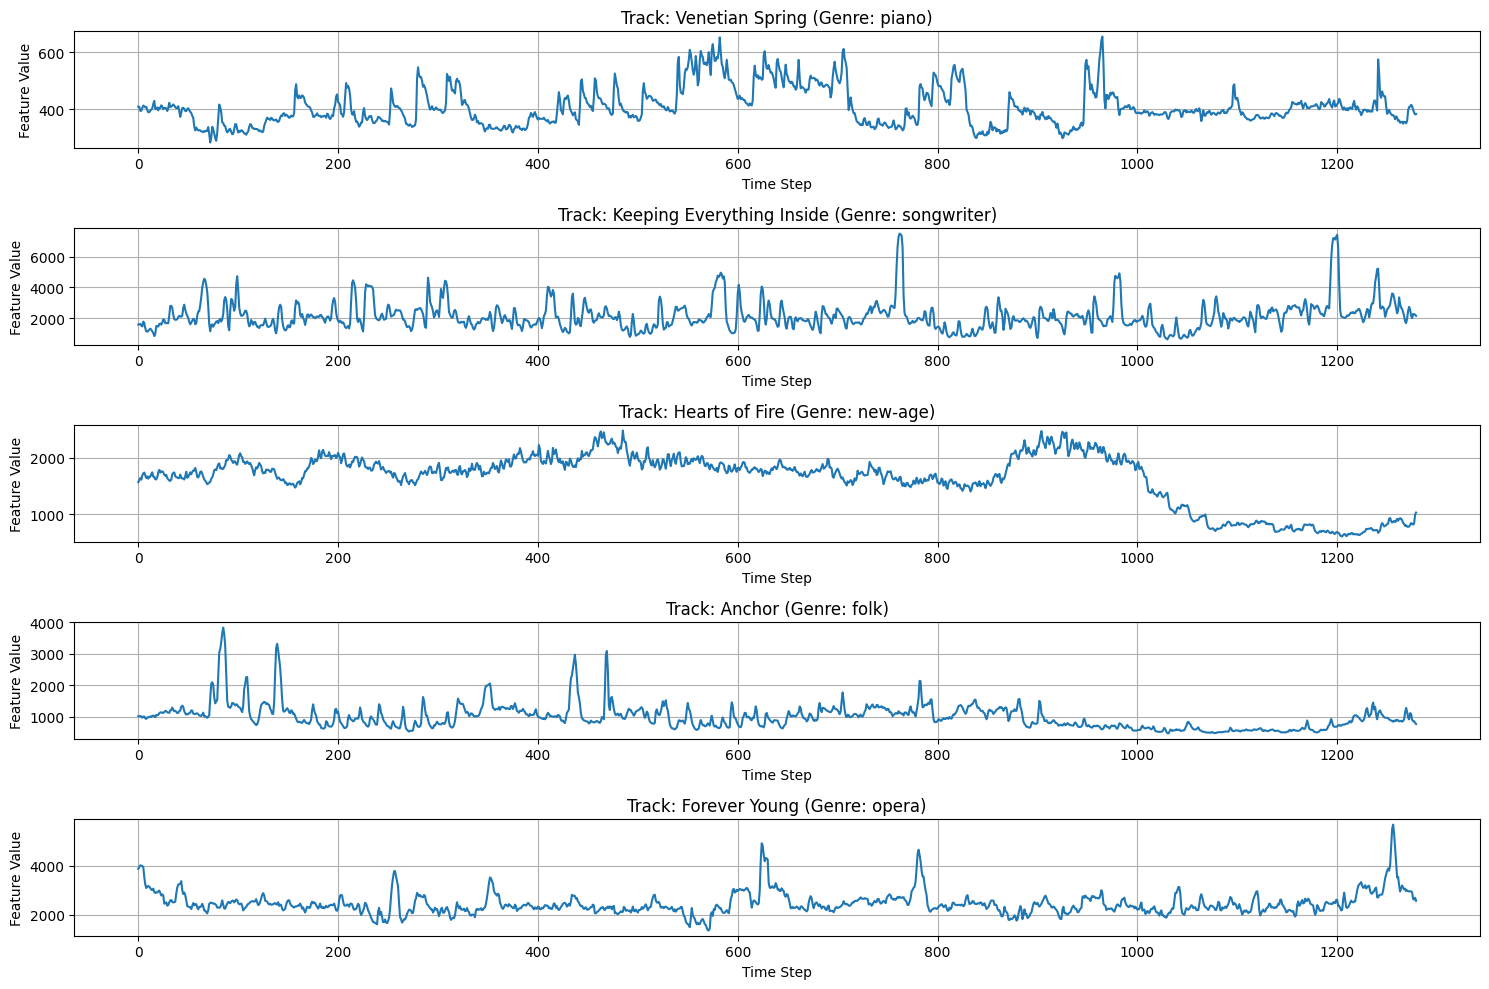

In [ ]:
# prompt: Visualize a few time series.

# Assuming df_combined is your DataFrame with time series data and track names

# Select a few random tracks for visualization
num_tracks_to_visualize = 5
random_track_indices = np.random.choice(df_time.shape[0], size=num_tracks_to_visualize, replace=False)
selected_tracks = df_time.iloc[random_track_indices]

# Create the time series plots
plt.figure(figsize=(15, 10))

for i, (index, row) in enumerate(selected_tracks.iterrows()):
    plt.subplot(num_tracks_to_visualize, 1, i + 1)  # Create subplots
    plt.plot(row.drop(['id', 'genre', 'name_x']).values)  # Plot the time series data
    plt.title(f"Track: {row['name_x']} (Genre: {row['genre']})")  # Set the title with track name and genre
    plt.xlabel("Time Step")
    plt.ylabel("Feature Value")
    plt.grid(True)  # Add a grid

plt.tight_layout()
plt.show()

In [ ]:
# prompt: Just check if df_combined has any duplicate rows

print(df_time.duplicated().sum())

0


In [ ]:
df_final.head(2)

id  acousticness       album_name album_release_date  \
0  0000vdREvCVMxbQTkS888c        0.0757            Lolly         2022-09-23   
1  000CC8EParg64OmTxVnZ0p        0.4060  Glee Love Songs         2021-02-11   

  album_release_date_precision  album_total_tracks album_type  danceability  \
0                          day                   1     single         0.910   
1                          day                 100      album         0.269   

   disc_number  duration_min  ...  time_signature  time_signature_confidence  \
0            1      2.678750  ...               4                      1.000   
1            1      5.382217  ...               4                      0.659   

   track_number  valence Artists_popularity  Artists_followers  \
0             1    0.432               45.0            16826.0   
1            10    0.341               67.0          1517867.0   

        broad_genre    artists  is_collaboration  total_tracks_all_artists  
0       Other/Niche       Rill                 0                         1  
1  Electronic/Dance  Glee Cast                 0                       171  

[2 rows x 41 columns]

In [ ]:
df_time=df_time.reset_index(drop=True)

In [ ]:
df_time

0            1            2            3            4  \
0     3072.768429  3098.137562  3127.474369  3095.008482  3712.321045   
1     3340.824259  3457.930915  3552.894993  3668.331816  3502.960815   
2     1818.807396  1846.170661  1966.209268  1934.102771  1888.684511   
3     2122.785148  2245.341454  2323.208305  2281.941052  2257.485409   
4     2250.805736  2205.054568  2281.626535  2346.646812  2349.701495   
...           ...          ...          ...          ...          ...   
7643  3057.546935  2979.758698  2783.908559  2592.834073  2436.414612   
7644  2371.887564  2136.939647  1976.419153  1863.858059  2267.643967   
7645  1934.895173  2070.349791  2275.037794  2438.166047  2469.472781   
7646  2336.076919  2341.477698  2235.839895  1961.441688  1779.748722   
7647  1110.455969  1055.669714   977.570357   961.329721   935.474196   

                5            6            7            8            9  ...  \
0     3449.950344  2647.363568  2234.473459  2335.339691  2430.087976  ...   
1     3177.368324  3085.153427  3033.716870  3042.894558  3187.760982  ...   
2     1994.169287  2143.801603  2239.960053  2138.987849  2548.700612  ...   
3     2213.720598  2206.991005  2327.754085  2284.647221  2320.261019  ...   
4     2336.480797  2184.853419  2066.543462  2107.220355  2205.124328  ...   
...           ...          ...          ...          ...          ...  ...   
7643  2292.004366  3184.566116  3637.792499  3356.640361  2806.934463  ...   
7644  2334.596041  2155.943379  1873.814401  1906.850712  1721.631286  ...   
7645  2484.870400  2605.318023  2546.289025  2449.566207  1976.485151  ...   
7646  2210.043546  2642.816303  2539.712385  2211.990951  1961.326445  ...   
7647   897.561941  1013.156097  1200.486841  1258.871369  1180.729791  ...   

             1273         1274         1275         1276         1277  \
0     2427.024426  2202.797369  2603.873047  2653.106042  2592.900993   
1     1124.563194  1215.093207  1248.890915  1254.067391  1241.926789   
2     1641.913259  2353.317298  3449.253140  3429.471893  2628.606390   
3     3975.647508  3994.929270  4366.577582  4077.340537  3775.721055   
4     3148.426371  3099.103426  3034.964913  2608.477179  2464.920238   
...           ...          ...          ...          ...          ...   
7643  1565.070566  1578.839628  1705.538221  1979.446806  1899.688478   
7644  1936.292055  1882.292476  1705.461242  1604.868674  1823.892402   
7645  2236.712956  1989.367258  1861.204784  1403.184246  1398.581153   
7646   499.603346  1063.819767  1337.862085  1105.437014  1106.213014   
7647  1207.212887  1242.505873  1282.659576  1294.077062  1279.049013   

             1278         1279                      id              genre  \
0     2763.512610  2742.837648  512rk6iIuzhzOtBGHTUVUS  progressive-house   
1     1232.992284  1276.787679  3hWfKBt3n7j1xqIy6LA5ve  progressive-house   
2     2220.877092  1960.415952  5N5k9nd479b1xpDZ4usjrg  progressive-house   
3     3738.064461  3767.146941  2UM5jlU2iLXDEAtzIfa1m0  progressive-house   
4     2540.528979  2395.488665  1PfLmjg83VihYZJtVQk1bX  progressive-house   
...           ...          ...                     ...                ...   
7643  1613.167758  1567.106417  4DeiulavvsCersENKheDhG               folk   
7644  2112.728352  2085.947766  4sNiMTu47WkUgW87qeUlWF               folk   
7645  1745.734379  1720.540164  7Js9QigZX8Gs6wvQpJEUEZ               folk   
7646  1141.251113   921.390655  3nKEiJUeaWn8q2O9I1xwlB               folk   
7647  1215.865242  1160.741490  7iQmjnDXYngWGsbjVnDc1U               folk   

                         name_x  
0                      Superman  
1                    Astronomia  
2     Promises (with Sam Smith)  
3                     Daydreams  
4                You Never Know  
...                         ...  
7643          Banoti Yaar Remix  
7644          Mere Rashke Qamar  
7645          Shahbaaz Qalandar  
7646              Shukran Allah  
7647                  Amst

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_combined is your DataFrame
time_series_data = df_time.drop(['id', 'genre', 'name_x'], axis=1)  # Select time series columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(time_series_data)

In [ ]:
# prompt: add scaled data and the id genre and name_x column from df_time together into a new data frame with correct data

# Create a new DataFrame with scaled data, id, genre, and name_x
scaled_df = pd.DataFrame(scaled_data)
scaled_df['id'] = df_time['id']
scaled_df['genre'] = df_time['genre']
scaled_df['name_x'] = df_time['name_x']

In [ ]:
scaled_df.head(5)

0         1         2         3         4         5         6  \
0  1.068296  1.082256  1.088104  1.052195  1.659464  1.346172  0.505234   
1  1.358997  1.471532  1.542915  1.655731  1.443372  1.067801  0.951021   
2 -0.291599 -0.272302 -0.153386 -0.169886 -0.222804 -0.140524 -0.007528   
3  0.038059  0.159578  0.228276  0.196282  0.157854  0.083690  0.056816   
4  0.176894  0.115990  0.183821  0.264398  0.253035  0.209057  0.034274   

          7         8         9  ...      1273      1274      1275      1276  \
0  0.085530  0.190639  0.261304  ...  0.276910  0.071359  0.465840  0.504428   
1  0.899100  0.911217  1.034463  ... -0.988936 -0.899489 -0.867352 -0.869560   
2  0.091115 -0.009326  0.382341  ... -0.486130  0.219310  1.297625  1.266892   
3  0.180483  0.139014  0.149232  ...  1.781998  1.832906  2.200198  1.903159   
4 -0.085410 -0.041679  0.031742  ...  0.978032  0.952368  0.889999  0.460598   

       1277      1278      1279                      id              genre  \
0  0.437559  0.632803  0.679713  512rk6iIuzhzOtBGHTUVUS  progressive-house   
1 -0.881728 -0.861283 -0.758420                     NaN                NaN   
2  0.472427  0.103085 -0.087810  3hWfKBt3n7j1xqIy6LA5ve  progressive-house   
3  1.592636  1.584155  1.684517                     NaN                NaN   
4  0.312580  0.415127  0.338978                     NaN                NaN   

       name_x  
0    Superman  
1         NaN  
2  Astronomia  
3         NaN  
4         NaN  

[5 rows x 1283 columns]

In [ ]:
scaled_df.head(5)

0         1         2         3         4         5         6  \
0  1.068296  1.082256  1.088104  1.052195  1.659464  1.346172  0.505234   
1  1.358997  1.471532  1.542915  1.655731  1.443372  1.067801  0.951021   
2 -0.291599 -0.272302 -0.153386 -0.169886 -0.222804 -0.140524 -0.007528   
3  0.038059  0.159578  0.228276  0.196282  0.157854  0.083690  0.056816   
4  0.176894  0.115990  0.183821  0.264398  0.253035  0.209057  0.034274   

          7         8         9  ...      1273      1274      1275      1276  \
0  0.085530  0.190639  0.261304  ...  0.276910  0.071359  0.465840  0.504428   
1  0.899100  0.911217  1.034463  ... -0.988936 -0.899489 -0.867352 -0.869560   
2  0.091115 -0.009326  0.382341  ... -0.486130  0.219310  1.297625  1.266892   
3  0.180483  0.139014  0.149232  ...  1.781998  1.832906  2.200198  1.903159   
4 -0.085410 -0.041679  0.031742  ...  0.978032  0.952368  0.889999  0.460598   

       1277      1278      1279                      id              genre  \
0  0.437559  0.632803  0.679713  512rk6iIuzhzOtBGHTUVUS  progressive-house   
1 -0.881728 -0.861283 -0.758420                     NaN                NaN   
2  0.472427  0.103085 -0.087810  3hWfKBt3n7j1xqIy6LA5ve  progressive-house   
3  1.592636  1.584155  1.684517                     NaN                NaN   
4  0.312580  0.415127  0.338978                     NaN                NaN   

       name_x  
0    Superman  
1         NaN  
2  Astronomia  
3         NaN  
4         NaN  

[5 rows x 1283 columns]

In [ ]:
scaled_df.head(5)

0         1         2         3         4         5         6  \
0  1.068296  1.082256  1.088104  1.052195  1.659464  1.346172  0.505234   
1  1.358997  1.471532  1.542915  1.655731  1.443372  1.067801  0.951021   
2 -0.291599 -0.272302 -0.153386 -0.169886 -0.222804 -0.140524 -0.007528   
3  0.038059  0.159578  0.228276  0.196282  0.157854  0.083690  0.056816   
4  0.176894  0.115990  0.183821  0.264398  0.253035  0.209057  0.034274   

          7         8         9  ...      1273      1274      1275      1276  \
0  0.085530  0.190639  0.261304  ...  0.276910  0.071359  0.465840  0.504428   
1  0.899100  0.911217  1.034463  ... -0.988936 -0.899489 -0.867352 -0.869560   
2  0.091115 -0.009326  0.382341  ... -0.486130  0.219310  1.297625  1.266892   
3  0.180483  0.139014  0.149232  ...  1.781998  1.832906  2.200198  1.903159   
4 -0.085410 -0.041679  0.031742  ...  0.978032  0.952368  0.889999  0.460598   

       1277      1278      1279                      id              genre  \
0  0.437559  0.632803  0.679713  512rk6iIuzhzOtBGHTUVUS  progressive-house   
1 -0.881728 -0.861283 -0.758420  3hWfKBt3n7j1xqIy6LA5ve  progressive-house   
2  0.472427  0.103085 -0.087810  5N5k9nd479b1xpDZ4usjrg  progressive-house   
3  1.592636  1.584155  1.684517  2UM5jlU2iLXDEAtzIfa1m0  progressive-house   
4  0.312580  0.415127  0.338978  1PfLmjg83VihYZJtVQk1bX  progressive-house   

                      name_x  
0                   Superman  
1                 Astronomia  
2  Promises (with Sam Smith)  
3                  Daydreams  
4             You Never Know  

[5 rows x 1283 columns]

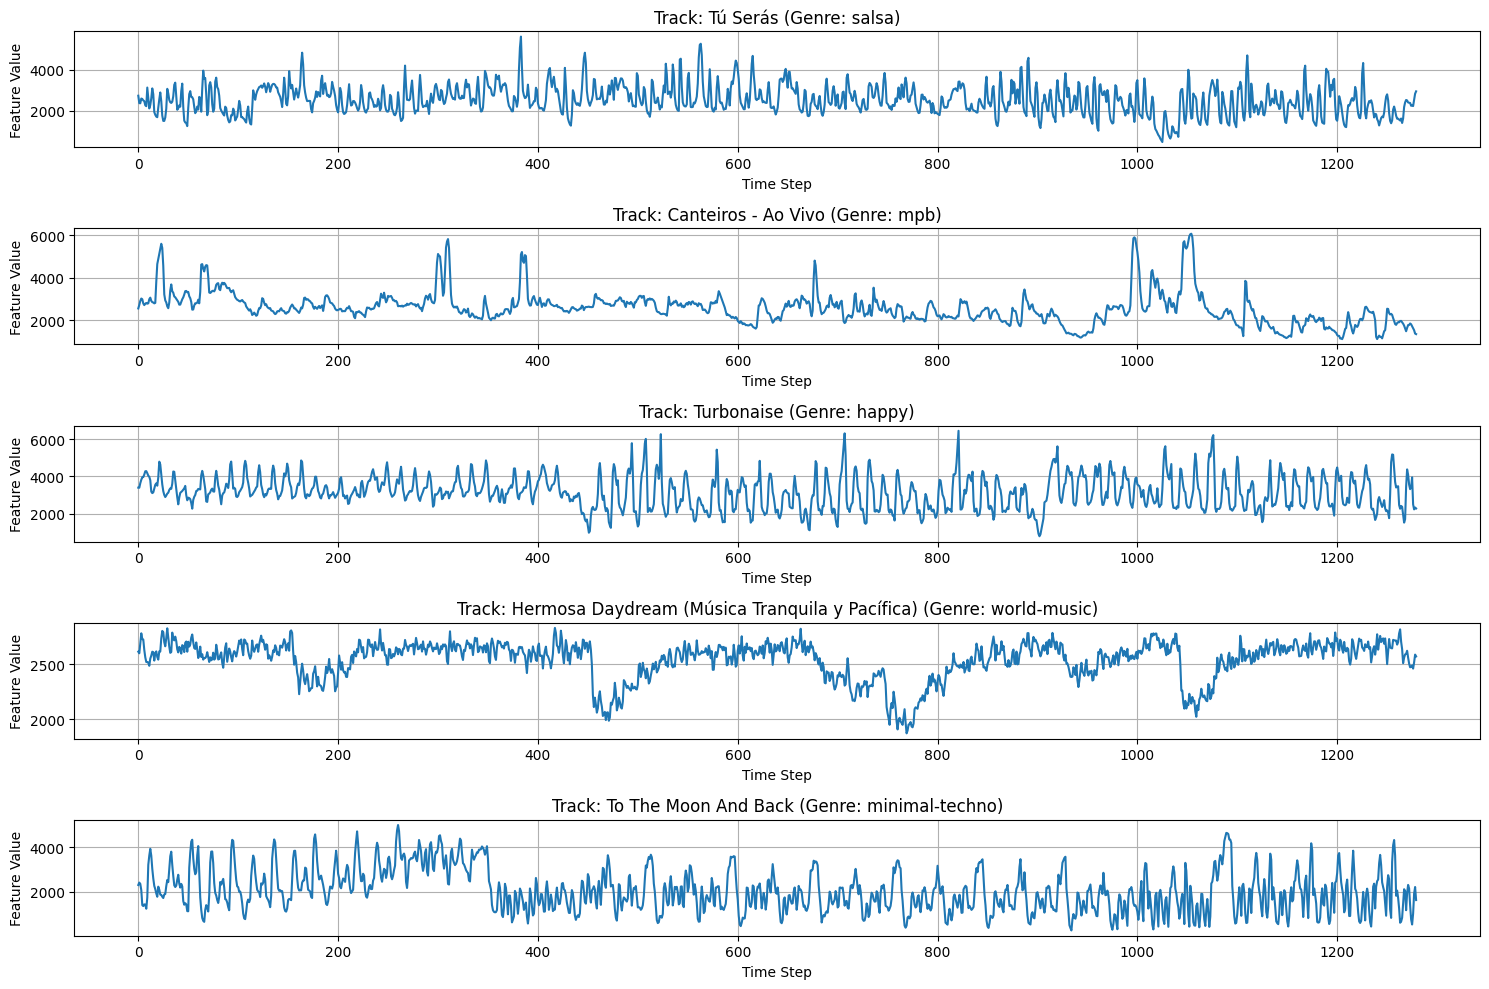

In [ ]:
# prompt: Visualize a few time series.

# Assuming df_combined is your DataFrame with time series data and track names
# Select a few random tracks for visualization
num_tracks_to_visualize = 5
random_track_indices = np.random.choice(df_time.shape[0], size=num_tracks_to_visualize, replace=False)
selected_tracks = df_time.iloc[random_track_indices]


# Create the time series plots
plt.figure(figsize=(15, 10))

for i, (index, row) in enumerate(selected_tracks.iterrows()):
    plt.subplot(num_tracks_to_visualize, 1, i + 1)  # Create subplots
    plt.plot(row.drop(['id', 'genre', 'name_x']).values)  # Plot the time series data
    plt.title(f"Track: {row['name_x']} (Genre: {row['genre']})")  # Set the title with track name and genre
    plt.xlabel("Time Step")
    plt.ylabel("Feature Value")
    plt.grid(True)  # Add a grid

plt.tight_layout()
plt.show()

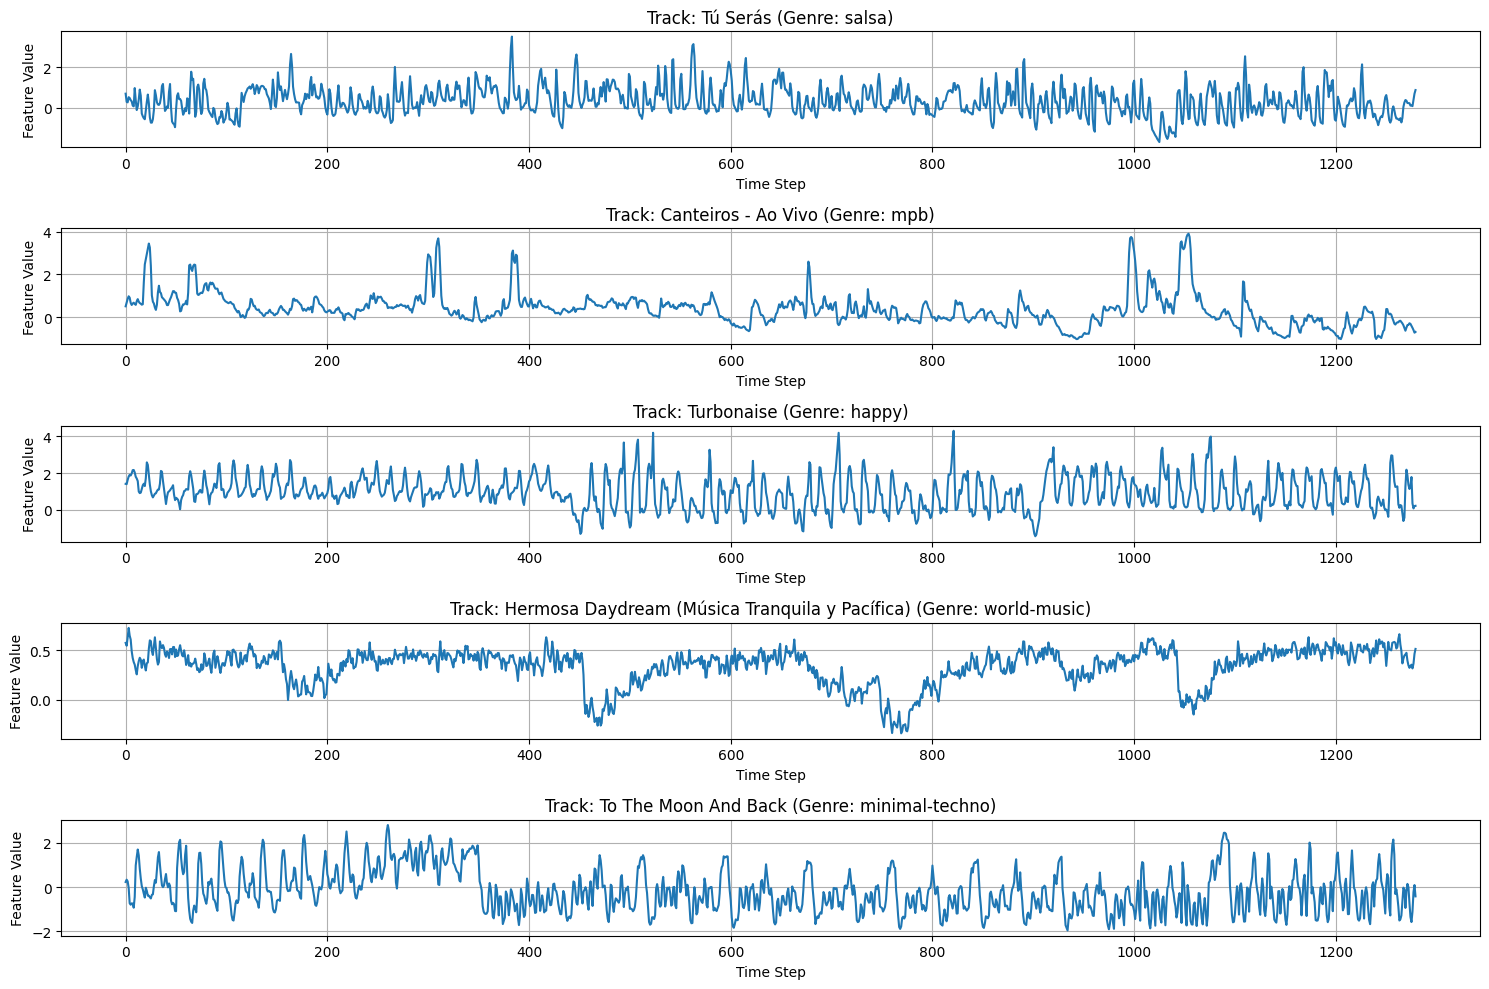

In [ ]:
# prompt: Visualize a few time series.

# Assuming df_combined is your DataFrame with time series data and track names

selected_tracks = scaled_df.iloc[random_track_indices]

# Create the time series plots
plt.figure(figsize=(15, 10))

for i, (index, row) in enumerate(selected_tracks.iterrows()):
    plt.subplot(num_tracks_to_visualize, 1, i + 1)  # Create subplots
    plt.plot(row.drop(['id', 'genre', 'name_x']).values)  # Plot the time series data
    plt.title(f"Track: {row['name_x']} (Genre: {row['genre']})")  # Set the title with track name and genre
    plt.xlabel("Time Step")
    plt.ylabel("Feature Value")
    plt.grid(True)  # Add a grid

plt.tight_layout()
plt.show()

In [ ]:
# # prompt: use a SAME track to see time series of scaled_df and df_time. Just one Track.

# import matplotlib.pyplot as plt

# # Assuming scaled_df and df_time are already defined and have a common 'id' column

# # Select a single track ID for visualization (replace with your desired track ID)
# track_id_to_visualize = '000xQL6tZNLJzIrtIgxqSl'

# # Find the indices of the selected track in both DataFrames
# index_scaled = scaled_df[scaled_df['id'] == track_id_to_visualize].index[0]
# index_time = df_time[df_time['id'] == track_id_to_visualize].index[0]

# # Extract time series data for the selected track
# scaled_track_data = scaled_df.iloc[index_scaled].drop(['id', 'genre', 'name_x']).values
# time_track_data = df_time.iloc[index_time].drop(['id', 'genre', 'name_x']).values

# # Create the plot
# plt.figure(figsize=(12, 6))
# plt.plot(scaled_track_data, label='scaled_df')
# plt.plot(time_track_data, label='df_time')

# # Set plot title and labels
# track_name = scaled_df.iloc[index_scaled]['name_x'] # Get track name
# plt.title(f"Time Series for Track: {track_name} (ID: {track_id_to_visualize})")
# plt.xlabel("Time Step")
# plt.ylabel("Feature Value")
# plt.legend()
# plt.grid(True)

# plt.show()

## TS Approximation

In [ ]:
# !pip install sktime


In [ ]:
scaled_df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
           1273,     1274,     1275,     1276,     1277,     1278,     1279,
           'id',  'genre', 'name_x'],
      dtype='object', length=1283)

###PAA Approximation

In [ ]:
!pip install sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.7/953.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skpro 2.8.0 requires scikit-learn<1.6.0,>=0.24.0, but you have scikit-learn 1.6.0 which is incompatible.
sktime 0.35.0 requires scikit-learn<1.6.0,>=0.24, but you have scikit-learn 1.6.0 which is incompatible.


In [ ]:
from sktime.transformations.series.paa import PAA

In [ ]:
# Step 1: Filter numeric columns
numeric_cols = scaled_df.select_dtypes(include=np.number).columns
time_series_data = scaled_df[numeric_cols].values  # Convert to NumPy array

# Step 2: Initialize PAA transformer
num_intervals = 70  # Define number of intervals
paa = PAA(frames=num_intervals)

# Step 3: Apply PAA transformation row-wise
paa_transformed = np.array([
    paa.fit_transform(pd.Series(row)).values for row in time_series_data
])

# Step 4: Flatten the PAA results for clustering
paa_features = paa_transformed

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
paa_features.shape

(7648, 70)

In [ ]:
# prompt: convert paa_features to a dataframe and then save in in the drive in the same folder as the tracks dataset as csv

import pandas as pd

# Assuming paa_features is already calculated as in the previous code

# Create a DataFrame from paa_features
paa_df = pd.DataFrame(paa_features.reshape(paa_features.shape[0], paa_features.shape[1]))

# Add back the 'id', 'genre', and 'name_x' columns
paa_df['id'] = scaled_df['id']
paa_df['genre'] = scaled_df['genre']
paa_df['name_x'] = scaled_df['name_x']

# Specify the path and filename
drive_path = '/content/drive/MyDrive/DM2/dataset/'
file_name = 'paa_features.csv'
output_path = os.path.join(drive_path, file_name)


# Save the DataFrame to a CSV file
paa_df.to_csv(output_path, index=False)

In [ ]:
scaled_df

0         1         2         3         4         5         6  \
0     1.068296  1.082256  1.088104  1.052195  1.659464  1.346172  0.505234   
1     1.358997  1.471532  1.542915  1.655731  1.443372  1.067801  0.951021   
2    -0.291599 -0.272302 -0.153386 -0.169886 -0.222804 -0.140524 -0.007528   
3     0.038059  0.159578  0.228276  0.196282  0.157854  0.083690  0.056816   
4     0.176894  0.115990  0.183821  0.264398  0.253035  0.209057  0.034274   
...        ...       ...       ...       ...       ...       ...       ...   
7643  1.051789  0.954177  0.720803  0.523558  0.342536  0.163636  1.052250   
7644  0.308205  0.042294 -0.142471 -0.243832  0.168339  0.207132  0.004836   
7645 -0.165704 -0.029753  0.176777  0.360740  0.376657  0.360598  0.462420   
7646  0.269369  0.263592  0.134872 -0.141106 -0.335242  0.079935  0.500603   
7647 -1.059792 -1.127580 -1.210325 -1.193921 -1.206660 -1.260418 -1.158828   

             7         8         9  ...      1273      1274      1275  \
0     0.085530  0.190639  0.261304  ...  0.276910  0.071359  0.465840   
1     0.899100  0.911217  1.034463  ... -0.988936 -0.899489 -0.867352   
2     0.091115 -0.009326  0.382341  ... -0.486130  0.219310  1.297625   
3     0.180483  0.139014  0.149232  ...  1.781998  1.832906  2.200198   
4    -0.085410 -0.041679  0.031742  ...  0.978032  0.952368  0.889999   
...        ...       ...       ...  ...       ...       ...       ...   
7643  1.514004  1.230738  0.645853  ... -0.560813 -0.541951 -0.418048   
7644 -0.281594 -0.245736 -0.461633  ... -0.200027 -0.243676 -0.418124   
7645  0.402935  0.306968 -0.201570  ...  0.091948 -0.138429 -0.264885   
7646  0.396241  0.065020 -0.217039  ... -1.596327 -1.048181 -0.779811   
7647 -0.966990 -0.905642 -1.013591  ... -0.908610 -0.872544 -0.834126   

          1276      1277      1278      1279                      id  \
0     0.504428  0.437559  0.632803  0.679713  512rk6iIuzhzOtBGHTUVUS   
1    -0.869560 -0.881728 -0.861283 -0.758420  3hWfKBt3n7j1xqIy6LA5ve   
2     1.266892  0.472427  0.103085 -0.087810  5N5k9nd479b1xpDZ4usjrg   
3     1.903159  1.592636  1.584155  1.684517  2UM5jlU2iLXDEAtzIfa1m0   
4     0.460598  0.312580  0.415127  0.338978  1PfLmjg83VihYZJtVQk1bX   
...        ...       ...       ...       ...                     ...   
7643 -0.157169 -0.239394 -0.490158 -0.473630  4DeiulavvsCersENKheDhG   
7644 -0.525040 -0.313413 -0.002490  0.035332  4sNiMTu47WkUgW87qeUlWF   
7645 -0.723113 -0.728748 -0.360747 -0.323118  7Js9QigZX8Gs6wvQpJEUEZ   
7646 -1.015529 -1.014259 -0.950841 -1.107050  3nKEiJUeaWn8q2O9I1xwlB   
7647 -0.830266 -0.845477 -0.878003 -0.872257  7iQmjnDXYngWGsbjVnDc1U   

                  genre                     name_x  
0     progressive-house                   Superman  
1     progressive-house                 Astronomia  
2     progressive-house  Promises (with Sam Smith)  
3     progressive-house                  Daydreams  
4     progressive-house             You Never Know  
...                 ...                        ...  
7643               folk          Banoti Yaar Remix  
7644               folk          Mere Rashke Qamar  
7645               folk          Shahbaaz Qalandar  
7646               folk              Shukran Allah  
7647               folk                  Amsterdam  

[7648 rows x 1283 columns]

In [ ]:
scaled_df.loc[scaled_df["id"]=="2UM5jlU2iLXDEAtzIfa1m0"]

0         1         2         3         4        5         6  \
3  0.038059  0.159578  0.228276  0.196282  0.157854  0.08369  0.056816   

          7         8         9  ...      1273      1274      1275      1276  \
3  0.180483  0.139014  0.149232  ...  1.781998  1.832906  2.200198  1.903159   

       1277      1278      1279                      id              genre  \
3  1.592636  1.584155  1.684517  2UM5jlU2iLXDEAtzIfa1m0  progressive-house   

      name_x  
3  Daydreams  

[1 rows x 1283 columns]

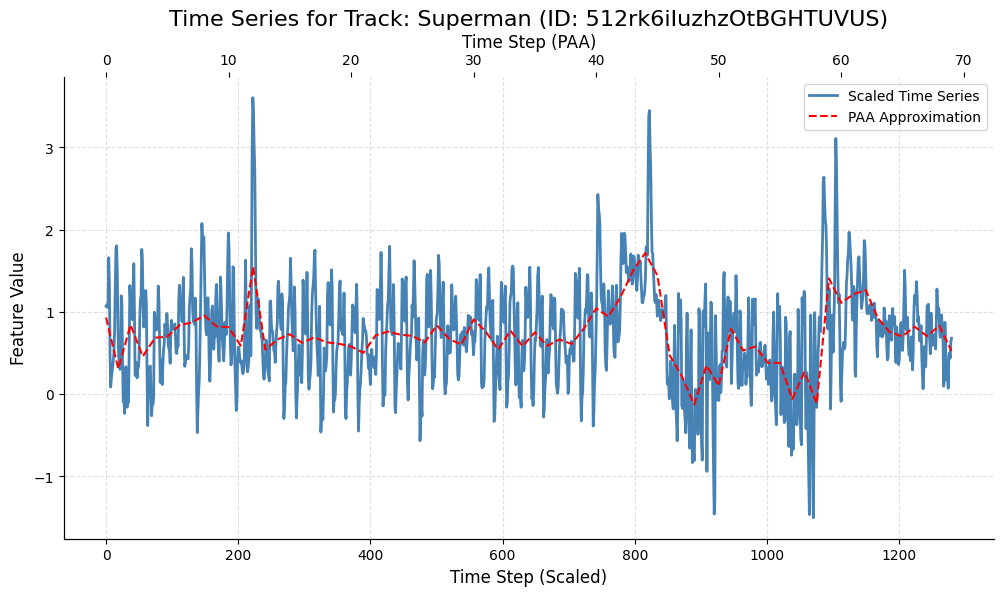

In [ ]:
import matplotlib.pyplot as plt

# ... (assuming scaled_df, df_time, and paa_features are already defined)

# Extract data for the selected track
scaled_track_data = scaled_df.iloc[0].drop(['id', 'genre', 'name_x']).values
paa_track_data = paa_features[0]

# Create the plot with a secondary x-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the scaled time series on the primary x-axis (softened color)
ax1.plot(scaled_track_data, label='Scaled Time Series', color='steelblue', linewidth=2)

# Create a secondary x-axis
ax2 = ax1.twiny()

# Plot the PAA approximation on the secondary x-axis (softened color)
ax2.plot(paa_track_data, label='PAA Approximation', color='red', linestyle='--', linewidth=1.5)

# Set plot title and labels
track_name = scaled_df.iloc[0]['name_x']
plt.title(f"Time Series for Track: {track_name} (ID: {scaled_df.iloc[0]['id']})", fontsize=16)
ax1.set_xlabel("Time Step (Scaled)", fontsize=12)
ax2.set_xlabel("Time Step (PAA)", fontsize=12)
ax1.set_ylabel("Feature Value", fontsize=12)

# Combine legends and improve appearance
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10, frameon=True, facecolor='white', framealpha=0.8)

# Enhance plot aesthetics (add grid, remove spines)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Add grid marks (light gray, dashed)
ax1.grid(True, linestyle='--', color='lightgray', alpha=0.7)

plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Step 5: Apply KMeans clustering
n_clusters = 5  # Define number of clusters
kmeans_paa = KMeans(n_clusters=n_clusters, random_state=42)
clusters_paa = kmeans_paa.fit_predict(paa_features)

# Step 6: Calculate silhouette score
silhouette_paa = silhouette_score(paa_features, clusters_paa)

# Step 7: Store results in DataFrame
scaled_df['cluster'] = clusters_paa  # Add cluster labels
print(f"Silhouette Score (PAA): {silhouette_paa}")

# Optional: Inspect PAA Features
paa_df = pd.DataFrame(paa_features, columns=[f'paa_interval_{i}' for i in range(num_intervals)])
print(paa_df.head())

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(paa_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters_paa, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('PAA (70 Intervals) Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Module 2: CLUSTERING TIME SERIES

In [ ]:
paa_features.shape

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

In [ ]:
paa_features

### Clustering with K-Means and Euclidean Distance

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sktime.clustering.k_means import TimeSeriesKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming paa_features is already loaded with shape (7648, 70)
# Reshape paa_features to (n_samples, 1, n_features)
paa_features_reshaped = paa_features[:, :, np.newaxis]

# Standardizing the features (important for clustering)
scaler = StandardScaler()
paa_features_scaled = scaler.fit_transform(paa_features.reshape(-1, paa_features.shape[1])).reshape(paa_features.shape)

# 1. Clustering using TimeSeriesKMeans
n_clusters = 3  # You can adjust this based on your data and goals
model_ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=42)
labels_ts_kmeans = model_ts_kmeans.fit_predict(paa_features_scaled)

# # 2. Dimensionality Reduction for Visualization
# # PCA for dimensionality reduction
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(paa_features_scaled.reshape(paa_features_scaled.shape[0], -1))

# # t-SNE for dimensionality reduction
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# X_tsne = tsne.fit_transform(paa_features_scaled.reshape(paa_features_scaled.shape[0], -1))


In [ ]:
# Assuming paa_features_scaled is the scaled PAA features (shape: [n_samples, n_timestamps])
paa_features_scaled = np.array(paa_features_scaled)

# Compute the silhouette score using cdist_dtw (efficient DTW distance computation)
silhouette_avg = silhouette_score(paa_features_scaled, labels_ts_kmeans, metric="euclidean")

# Alternatively, use cdist_dtw directly for pairwise DTW distances (if you prefer)
# dtw_distances = cdist_dtw(paa_features_scaled, paa_features_scaled)
# silhouette_avg = silhouette_score(dtw_distances, labels_ts_kmeans, metric="precomputed")

print(f"The average silhouette score is: {silhouette_avg}")

In [ ]:
# 3. Visualization of Clusters

# Create subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Changed to 1 row, 2 columns

# TimeSeriesKMeans with PCA
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_ts_kmeans, cmap='viridis', s=50)
axes[0].set_title("TimeSeriesKMeans Clusters (PCA) Euclidean")

# TimeSeriesKMeans with t-SNE
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_ts_kmeans, cmap='viridis', s=50)
axes[1].set_title("TimeSeriesKMeans Clusters (t-SNE) Euclidean")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# prompt: Calculate Clustering performance of above given Clustering

from sklearn.metrics import silhouette_score

# Assuming 'paa_features' and 'clusters_paa' are defined from previous code
# Calculate silhouette score
silhouette_avg = silhouette_score(paa_features, clusters_paa)
print(f"The average silhouette score is : {silhouette_avg}")

In [ ]:
from sktime.clustering.k_means import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Reshape paa_features for TimeSeriesKMeans (n_samples, n_timestamps, n_features)
paa_features_reshaped = paa_features[:, :, np.newaxis]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
paa_features_scaled = scaler.fit_transform(paa_features.reshape(-1, paa_features.shape[1])).reshape(paa_features.shape)

# 1. Elbow Method: Calculate WCSS (Within-Cluster Sum of Squares)
wcss = []
for i in range(1, 11):  # Test with 1 to 10 clusters
    model_ts_kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", random_state=42)
    model_ts_kmeans.fit(paa_features_scaled)
    wcss.append(model_ts_kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 2. Silhouette Score: Calculate silhouette scores for different cluster numbers
silhouette_scores = []
for i in range(2, 11):  # Start from 2 because silhouette score is undefined for 1 cluster
    model_ts_kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", random_state=42)
    labels = model_ts_kmeans.fit_predict(paa_features_scaled)
    silhouette_avg = silhouette_score(paa_features_scaled.reshape(paa_features_scaled.shape[0], -1), labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the Elbow and Silhouette Score, choose the optimal number of clusters
optimal_clusters = 3  # Modify based on the Elbow plot and Silhouette score analysis

# Apply TimeSeriesKMeans with the chosen optimal number of clusters
model_ts_kmeans = TimeSeriesKMeans(n_clusters=optimal_clusters, metric="euclidean", random_state=42)
labels_ts_kmeans = model_ts_kmeans.fit_predict(paa_features_scaled)



### Clustering with K-Means and DTW Distance

In [ ]:
# 1. Clustering using TimeSeriesKMeans
n_clusters = 3  # You can adjust this based on your data and goals
model_ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
labels_ts_kmeans = model_ts_kmeans.fit_predict(paa_features_scaled)

# 2. Dimensionality Reduction for Visualization
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(paa_features_scaled.reshape(paa_features_scaled.shape[0], -1))

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(paa_features_scaled.reshape(paa_features_scaled.shape[0], -1))

In [ ]:
from sklearn.metrics import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import cdist_dtw
import numpy as np

# Assuming paa_features_scaled is the scaled PAA features (shape: [n_samples, n_timestamps])
paa_features_scaled = np.array(paa_features_scaled)

# Compute the silhouette score using cdist_dtw (efficient DTW distance computation)
silhouette_avg = silhouette_score(paa_features_scaled, labels_ts_kmeans, metric="euclidean")

# Alternatively, use cdist_dtw directly for pairwise DTW distances (if you prefer)
# dtw_distances = cdist_dtw(paa_features_scaled, paa_features_scaled)
# silhouette_avg = silhouette_score(dtw_distances, labels_ts_kmeans, metric="precomputed")

print(f"The average silhouette score is: {silhouette_avg}")


In [ ]:
# 3. Visualization of Clusters

# Create subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Changed to 1 row, 2 columns

# TimeSeriesKMeans with PCA
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_ts_kmeans, cmap='viridis', s=50)
axes[0].set_title("TimeSeriesKMeans Clusters (PCA) DTW distance")

# TimeSeriesKMeans with t-SNE
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_ts_kmeans, cmap='viridis', s=50)
axes[1].set_title("TimeSeriesKMeans Clusters (t-SNE) DTW distance")

# Show the plot
plt.tight_layout()
plt.show()

## DBScan Algorithm

In [ ]:
# # prompt: Implement DBScan Algorithm

# # Assuming 'paa_features_scaled' is your preprocessed data
# dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
# labels_dbscan = dbscan.fit_predict(paa_features_scaled)

# # Evaluate the clustering (e.g., silhouette score)
# silhouette_avg_dbscan = silhouette_score(paa_features_scaled, labels_dbscan)
# print(f"Silhouette score for DBSCAN: {silhouette_avg_dbscan}")

# # Visualize the clusters (using PCA for dimensionality reduction)
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(paa_features_scaled)

# plt.figure(figsize=(10, 6))
# plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_dbscan, cmap='viridis', alpha=0.7)
# plt.colorbar(label='Cluster Label')
# plt.title('DBSCAN Clustering Results (Visualized with PCA)')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()

In [ ]:
from sktime.transformations.series.summarize import SummaryTransformer

In [ ]:
transformer = SummaryTransformer()

In [ ]:
X_train=scaled_df.drop(['id','genre','name_x','cluster'],axis=1)

In [ ]:
F_train = transformer.fit_transform(X_train)
F_train

In [ ]:
clusterer = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

In [ ]:
paa_features_scaled = scaler.fit_transform(paa_features.reshape(-1, paa_features.shape[1])).reshape(paa_features.shape)


In [ ]:
clusterer.fit(paa_features_scaled)

In [ ]:
# F_train["cluster"] = clusterer.labels_

In [ ]:
np.unique(clusterer.labels_)

In [ ]:
# prompt: Use PCA and T-SNE to visualize the data of clusterer

# # Apply PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(paa_features_scaled)

# # Apply t-SNE
# tsne = TSNE(n_components=2, random_state=0)
# tsne_result = tsne.fit_transform(paa_features_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusterer.labels_, cmap='viridis')
plt.title('PCA visualization of clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusterer.labels_, cmap='viridis')
plt.title('t-SNE visualization of clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
print("Full shape of the dataset:", F_train.shape)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# from sklearn.neighbors import NearestNeighbors

# # 1. K-Distance Plot (to find optimal eps)

# # Find the k-nearest neighbors for each time series point
# k = 5  # min_samples
# nbrs = NearestNeighbors(n_neighbors=k)
# nbrs.fit(paa_features_scaled)  # Use scaled or original time series data here
# distances, indices = nbrs.kneighbors(paa_features_scaled)

# # Sort the distances for each point and plot
# distances = np.sort(distances[:, k-1], axis=0)  # k-th nearest neighbor
# plt.plot(distances)
# plt.title('K-Distance Plot')
# plt.xlabel('Points')
# plt.ylabel(f'{k}-th Nearest Neighbor Distance')
# plt.show()

# # The "elbow" in the plot is a good estimate for the eps value.

# # 2. Perform Grid Search to find the best eps and min_samples for DBSCAN
# from sklearn.model_selection import GridSearchCV

# def silhouette_scorer(estimator, X):
#     labels = estimator.labels_
#     # Exclude -1 labels (outliers) for silhouette score calculation
#     if len(set(labels)) > 1:  # Ensure there are at least two clusters
#         return silhouette_score(X, labels)
#     else:
#         return -1  # Return a very low score if only one cluster (no valid silhouette score)

# # Define parameter grid for eps and min_samples
# param_grid = {
#     'eps': np.linspace(0.1, 2.0, 20),  # Try eps values from 0.1 to 2.0
#     'min_samples': [3, 4, 5, 6, 7, 8]  # Different min_samples values
# }

# # Create DBSCAN instance
# dbscan = DBSCAN()

# # Perform grid search with silhouette scoring (use custom scorer)
# grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_scorer, cv=3)
# grid_search.fit(paa_features_scaled)

# # Get the best parameters
# print(f"Best DBSCAN parameters: {grid_search.best_params_}")
# print(f"Best silhouette score: {grid_search.best_score_}")

# # 3. Apply the best model found from grid search
# best_dbscan = grid_search.best_estimator_
# labels = best_dbscan.labels_

# # Visualize the results
# plt.scatter(range(len(labels)), labels, c=labels, cmap='viridis')
# plt.title('DBSCAN Clustering (Best Model)')
# plt.xlabel('Index')
# plt.ylabel('Cluster Label')
# plt.show()



### Hierarchical Clustering

In [ ]:
# prompt: Use hierarchical clustering for the time series PAA data

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Assuming paa_features_scaled is your preprocessed data
# Use the scaled data for hierarchical clustering


# Based on the dendrogram, choose the optimal number of clusters
optimal_clusters = 3 # Example, change based on your dendrogram

# Assuming 'paa_features_scaled' is your data and 'optimal_clusters' is defined
hierarchical_clusterer = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
# Remove affinity='euclidean'
labels_hierarchical = hierarchical_clusterer.fit_predict(paa_features_scaled)


# Evaluate the clustering (e.g., silhouette score)
silhouette_avg_hierarchical = silhouette_score(paa_features_scaled, labels_hierarchical)
print(f"Silhouette score for Hierarchical Clustering: {silhouette_avg_hierarchical}")

# Visualize the clusters (using PCA or t-SNE)
# ... (same PCA or t-SNE visualization code as before)

# # For example, using PCA:
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(paa_features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_hierarchical, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('Hierarchical Clustering Results (Visualized with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# prompt: Dendogram of clustering

import scipy.cluster.hierarchy as sch

# Assuming paa_features_scaled is your preprocessed data
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
dendrogram = sch.dendrogram(sch.linkage(paa_features_scaled[100:200], method='ward')) # Changed linkage method to 'ward'
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Motif/Anamolies

In [ ]:
!pip install matrixprofile-ts

In [ ]:
!pip install matrixprofile-ts

In [ ]:
from matrixprofile import *

In [ ]:
df_paa=pd.read_csv("/content/drive/MyDrive/DM2/dataset/paa_features.csv")

In [ ]:
paa_features=df_paa.iloc[:,:-3]

In [ ]:
paa_df = pd.DataFrame(paa_features)

In [ ]:
# import stumpy

In [ ]:
# df_time.iloc[:1,0:1280]

0            1            2            3            4     \
0  3072.768429  3098.137562  3127.474369  3095.008482  3712.321045   

          5            6            7            8            9     ...  \
0  3449.950344  2647.363568  2234.473459  2335.339691  2430.087976  ...   

         1270         1271         1272         1273         1274  \
0  2766.86422  2339.628891  2329.762069  2427.024426  2202.797369   

          1275         1276         1277        1278         1279  
0  2603.873047  2653.106042  2592.900993  2763.51261  2742.837648  

[1 rows x 1280 columns]

In [ ]:
ts = df_time.iloc[:1,0:1280].values

In [ ]:
# prompt: Convert ts to pandas series

# Assuming 'ts' is your time series data (e.g., a NumPy array or list)
ts_series = pd.Series(ts.flatten()) # Convert to 1D array first and then to Series.

ts_series

0       3072.768429
1       3098.137562
2       3127.474369
3       3095.008482
4       3712.321045
           ...     
1275    2603.873047
1276    2653.106042
1277    2592.900993
1278    2763.512610
1279    2742.837648
Length: 1280, dtype: float64

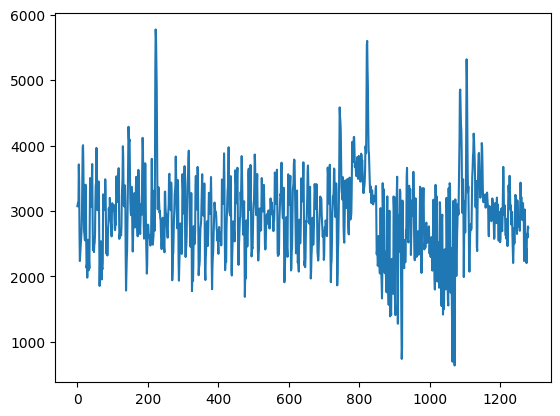

In [ ]:
plt.plot(ts_series)
plt.show()

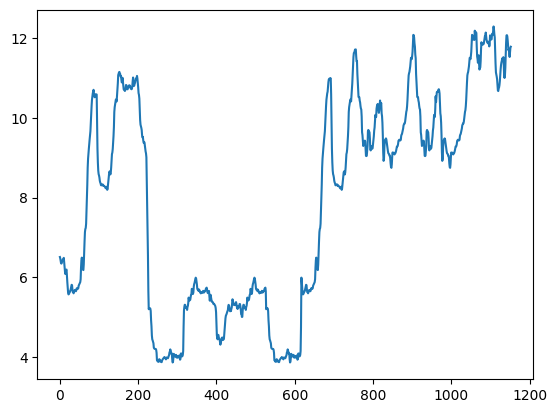

In [ ]:
w = 128
mp, mpi = matrixProfile.stomp(ts_series.values, w)

plt.plot(mp)
plt.show()

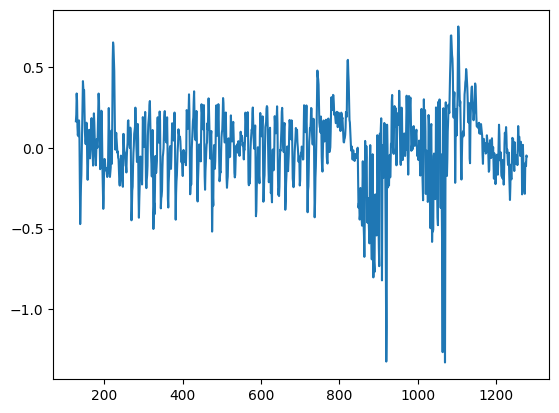

In [ ]:
window = 128

# Use the rolling() method on the pandas Series
ts_log_mov_diff = pd.Series(np.log(ts_series) - np.log(ts_series).rolling(window, center=False).mean(), index=ts_series.index)

plt.plot(ts_log_mov_diff)
plt.show()

In [ ]:
ts_log_mov_diff

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1275   -0.114272
1276   -0.092375
1277   -0.112523
1278   -0.047292
1279   -0.053743
Length: 1280, dtype: float64

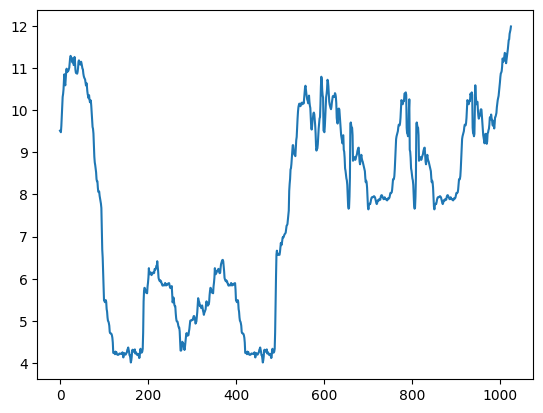

In [ ]:
w = 128
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[127:], w)

plt.plot(mp)
plt.show()

In [ ]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts_series.values, (mp, mpi), max_motifs=5)

In [ ]:
mo

[[161, 461], [701, 851], [2, 302]]

In [ ]:
mod

[4.013328227241949, 7.644245174511611, 9.473040466138267]

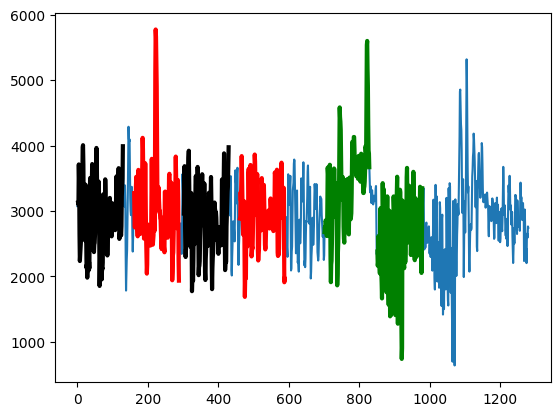

In [ ]:
plt.plot(ts_series.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_series.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

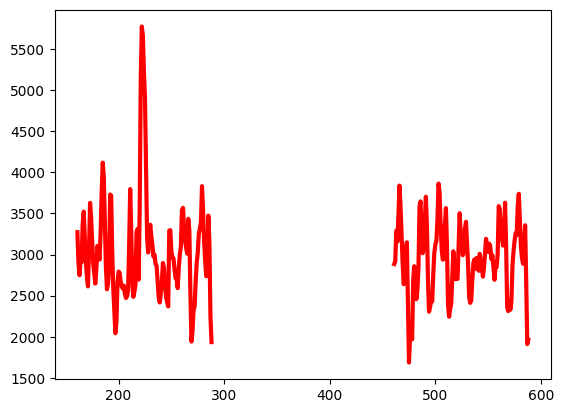

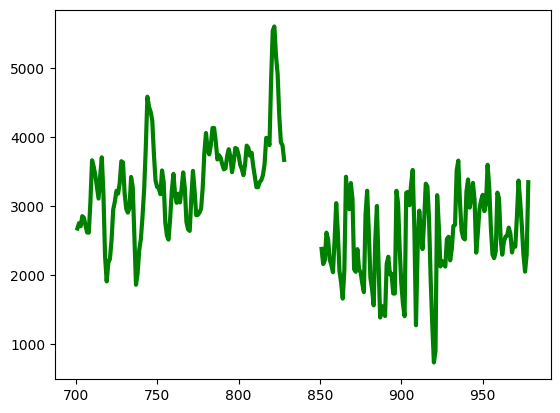

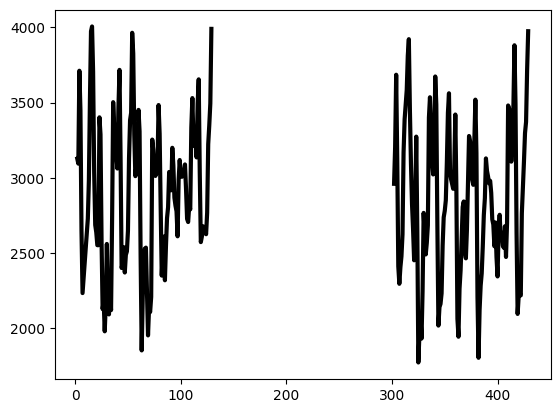

In [ ]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_series.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [ ]:
from matrixprofile.discords import discords

In [ ]:
anoms = discords(mp, ex_zone=3, k=5)

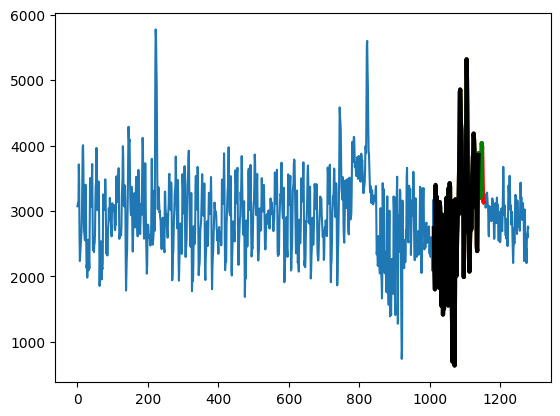

In [ ]:
plt.plot(ts_series.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts_series.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [ ]:
mp, mpi = matrixProfile.naiveMP(ts_series.values, m=12)

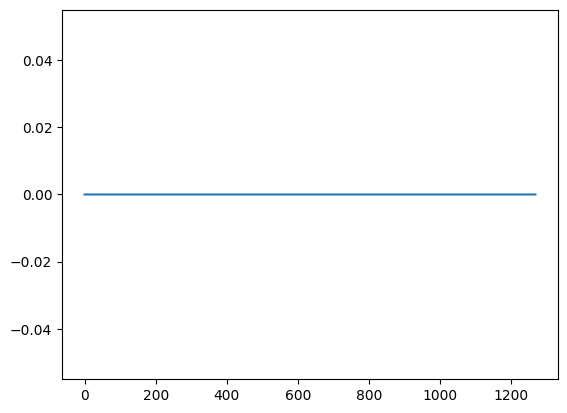

In [ ]:
plt.plot(mp)
plt.show()

#### Motifs on Approximation

In [ ]:
TS_PAA=df_paa.iloc[:1,:-3].values
# prompt: Convert ts to pandas series

# Assuming 'ts' is your time series data (e.g., a NumPy array or list)
ts_series = pd.Series(TS_PAA.flatten()) # Convert to 1D array first and then to Series.

ts_series

0     0.931451
1     0.308360
2     0.841494
3     0.458244
4     0.686264
        ...   
65    0.703449
66    0.819384
67    0.704816
68    0.830967
69    0.524769
Length: 70, dtype: float64

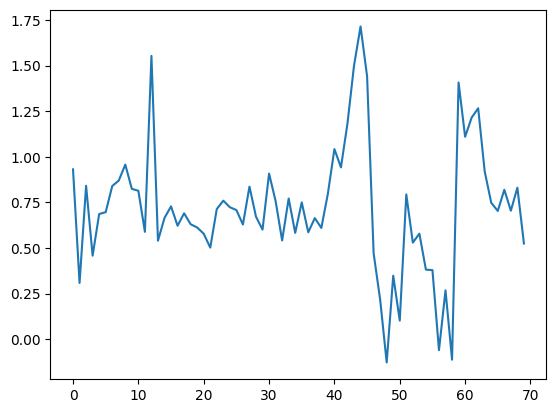

In [ ]:
plt.plot(ts_series)
plt.show()

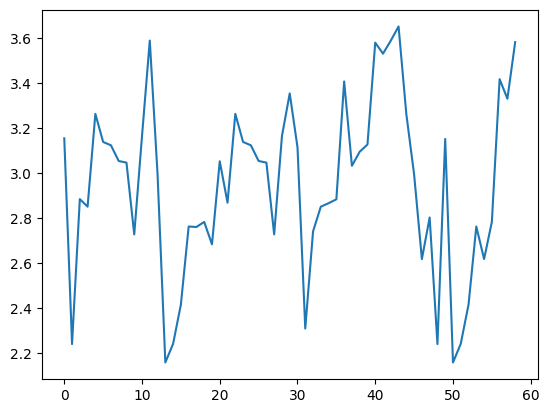

In [ ]:
w = 12
mp, mpi = matrixProfile.stomp(ts_series.values, w)

plt.plot(mp)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


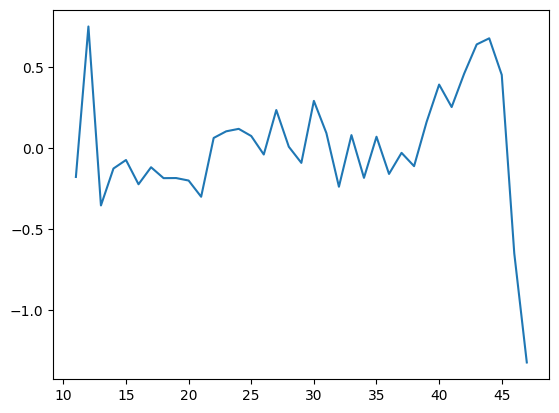

In [ ]:
window = 12

# Use the rolling() method on the pandas Series
ts_log_mov_diff = pd.Series(np.log(ts_series) - np.log(ts_series).rolling(window, center=False).mean(), index=ts_series.index)

plt.plot(ts_log_mov_diff)
plt.show()

/usr/local/lib/python3.10/dist-packages/matrixprofile/utils.py:177: RuntimeWarning: divide by zero encountered in divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
/usr/local/lib/python3.10/dist-packages/matrixprofile/utils.py:200: RuntimeWarning: divide by zero encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))
/usr/local/lib/python3.10/dist-packages/matrixprofile/utils.py:200: RuntimeWarning: invalid value encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))


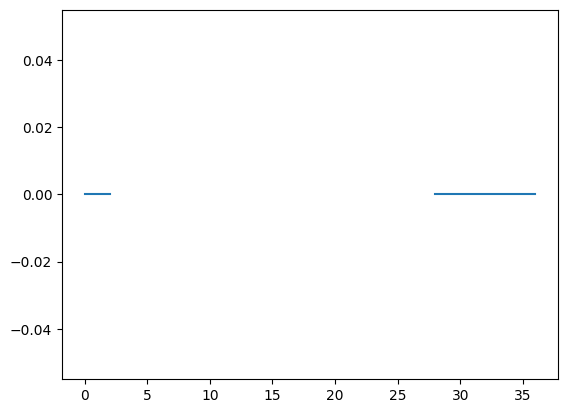

In [ ]:
w = 12
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)

plt.plot(mp)
plt.show()

In [ ]:
mpi

array([37., 38., 37., 21., 22., 22., 23., 24., 37., 38., 36., 26., 27.,
       28., 29.,  0., 31., 32., 37., 38., 39., 37., 38., 37., 37., 37.,
       37., 38., 37., 38., 37., 38., 39., 40., 41., 42., 43.,  0.,  1.,
        0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  0.])

In [ ]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts_series.values, (mp, mpi), max_motifs=5)

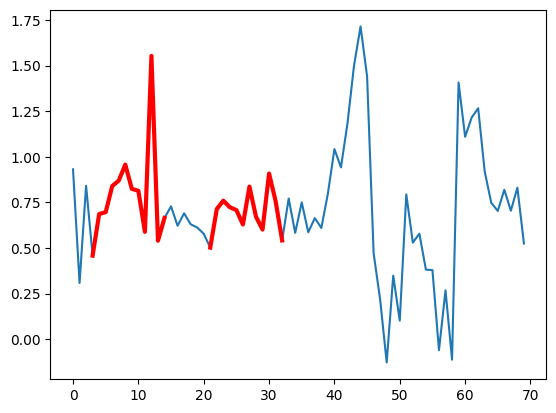

In [ ]:
plt.plot(ts_series.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_series.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

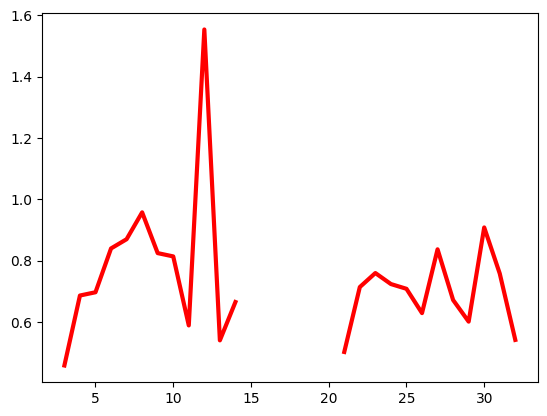

In [ ]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_series.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [ ]:
anoms = discords(mp, ex_zone=3, k=5)

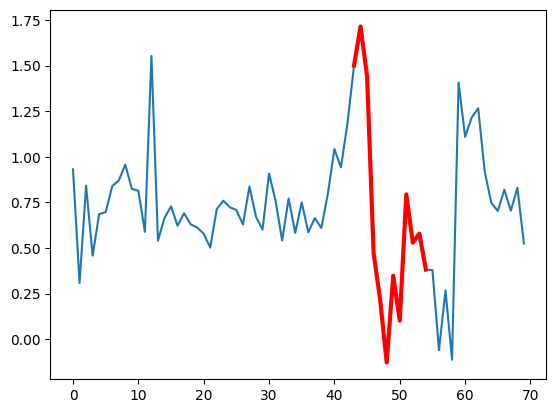

In [ ]:
plt.plot(ts_series.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts_series.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

# Classification

In [ ]:
# TimeSeriesDataX.shape

In [ ]:
paa_features_scaled.shape

In [ ]:
import pandas as pd

# Reshape TimeSeriesDataX to 2D before creating the DataFrame
TimeSeriesDataX_2d = TimeSeriesDataX.reshape(TimeSeriesDataX.shape[0], -1)
#Now the shape will be (7648, 1280) - (samples, features)

# Convert the reshaped data to a DataFrame
TimeSeriesDataX_df = pd.DataFrame(TimeSeriesDataX_2d)
TimeSeriesDatay_df = pd.DataFrame(TimeSeriesDatay)

# Print the first few rows of the DataFrame to verify
print(TimeSeriesDatay_df.head())

                   0
0  progressive-house
1  progressive-house
2  progressive-house
3  progressive-house
4  progressive-house


In [ ]:
TimeSeriesDatay_df[0].unique()

array(['progressive-house', 'mpb', 'mpb (1)', 'opera', 'songwriter',
       'j-idol', 'minimal-techno', 'happy', 'synth-pop', 'new-age',
       'new-age (1)', 'heavy-metal', 'kids', 'goth', 'emo', 'emo (1)',
       'salsa', 'piano', 'piano (1)', 'honky-tonk', 'folk', 'sleep',
       'world-music', 'sertanejo', 'sertanejo (1)', 'folk (1)'],
      dtype=object)

In [ ]:
# prompt: array(['progressive-house', 'mpb', 'mpb (1)', 'opera', 'songwriter',
#        'j-idol', 'minimal-techno', 'happy', 'synth-pop', 'new-age',
#        'new-age (1)', 'heavy-metal', 'kids', 'goth', 'emo', 'emo (1)',
#        'salsa', 'piano', 'piano (1)', 'honky-tonk', 'folk', 'sleep',
#        'world-music', 'sertanejo', 'sertanejo (1)', 'folk (1)'],
#       dtype=object) Make overlapping genres into correct form and replace it in original dataframe  TimeSeriesDatay_df

import pandas as pd
import numpy as np

# Assuming TimeSeriesDatay_df is your DataFrame and the genres are in a column named 'genre'
# Replace 'genre' with the actual column name if it's different

genres_to_correct = np.array(['progressive-house', 'mpb', 'mpb (1)', 'opera', 'songwriter',
       'j-idol', 'minimal-techno', 'happy', 'synth-pop', 'new-age',
       'new-age (1)', 'heavy-metal', 'kids', 'goth', 'emo', 'emo (1)',
       'salsa', 'piano', 'piano (1)', 'honky-tonk', 'folk', 'sleep',
       'world-music', 'sertanejo', 'sertanejo (1)', 'folk (1)'],
      dtype=object)


def correct_genre(genre):
    if genre == "mpb (1)":
      return "mpb"
    elif genre == "new-age (1)":
      return "new-age"
    elif genre == "emo (1)":
      return "emo"
    elif genre == "piano (1)":
      return "piano"
    elif genre == "sertanejo (1)":
      return "sertanejo"
    elif genre == "folk (1)":
      return "folk"
    else:
      return genre


TimeSeriesDatay_df[0] = TimeSeriesDatay_df[0].apply(correct_genre)

In [ ]:
type(TimeSeriesDatay_df)

pandas.core.frame.DataFrame

In [ ]:
TimeSeriesDatay_df[0].unique()

In [ ]:
X=paa_df.iloc[:,0:70]
y=TimeSeriesDatay_df[0]

In [ ]:
y

0       progressive-house
1       progressive-house
2       progressive-house
3       progressive-house
4       progressive-house
              ...        
7643                 folk
7644                 folk
7645                 folk
7646                 folk
7647                 folk
Name: 0, Length: 7648, dtype: object

Encoding Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder to encode string labels

y = LabelEncoder().fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary function

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6118, 70), (1530, 70), (6118,), (1530,))

In [ ]:
from sklearn.metrics import classification_report
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ... (Your existing code) ...

knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw")
knn_dtw.fit(X_train, y_train)
y_pred_dtw = knn_dtw.predict(X_test)
print(classification_report(y_test, y_pred_dtw))

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ... (Your existing code) ...

knn_Euc = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="euclidean")
knn_Euc.fit(X_train, y_train)
y_pred_euc = knn_Euc.predict(X_test)
print(classification_report(y_test, y_pred_euc))

In [ ]:

# ... (Your existing code) ...

knn_ddtw = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="ddtw")
knn_ddtw.fit(X_train, y_train)
y_pred_ddtw = knn_ddtw.predict(X_test)
print(classification_report(y_test, y_pred_ddtw))

In [ ]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier as the estimator
rf = RandomForestClassifier(n_estimators=100, random_state=42)

st = ShapeletTransformClassifier(
    estimator=rf,  # Set the estimator
    transform_limit_in_minutes=1  # Limit the time for shapelet transformation
)

In [ ]:
st.fit(X_train, y_train)


In [ ]:
y_pred = st.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
st

In [ ]:
y_pred

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform

In [ ]:
rst = RandomShapeletTransform(n_shapelet_samples=10, max_shapelets=None, min_shapelet_length=3, max_shapelet_length=None, n_jobs=-1) #n_jobs -1 uses all processors

In [ ]:
TimeSeriesDataX.shape

(7648, 1, 1280)

In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary function

X_train, X_test, y_train, y_test = train_test_split(
    TimeSeriesDataX, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6118, 1, 1280), (1530, 1, 1280), (6118,), (1530,))

In [ ]:
scaler = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [ ]:
# scaler = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
TimeSeriesDataX.shape

(7648, 1, 1280)

In [ ]:
X_paa=paa_df.iloc[:,0:70]

In [ ]:
X_paa.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
65    0
66    0
67    0
68    0
69    0
Length: 70, dtype: int64

In [ ]:
X_paa_sample=X_paa.iloc[0:100]
y_train_sample=y_train[0:100]

In [ ]:
# prompt: make a array of random values from 1-20 of 100 length.

import numpy as np

random_array = np.random.randint(1, 21, 100)
random_array

array([18, 20, 12, 12,  7,  2, 12,  2, 11,  5, 20, 17,  3,  5,  5, 13,  5,
        7, 16,  7,  2, 10, 10, 16, 10, 20, 14,  9, 16,  6,  4,  8, 12,  5,
       10,  3,  2,  2,  3, 11,  7, 11,  3, 17, 15, 13, 15, 19,  6, 20,  3,
       20, 12,  5, 16, 16, 14, 14, 20,  5, 12, 20,  1,  6, 10,  4, 20, 14,
       14,  3,  6, 17, 13,  9,  9, 14, 10, 12, 14, 18, 10,  6,  1,  9,  1,
        8, 15, 16,  8, 16, 16,  5, 13,  6,  5,  8, 11,  7, 11,  4])

In [ ]:
X_paa_sample

0         1         2         3         4         5         6   \
0   0.931451  0.308360  0.841494  0.458244  0.686264  0.696935  0.839721   
1   1.169337  1.141636  1.187187  0.964575  0.992950  1.180524  0.786334   
2   0.385742  0.233457  0.900740  0.614890  1.062563  0.393871  0.214965   
3   0.492540  0.436738 -0.005199  0.189835 -0.312059 -0.130423  0.673348   
4   0.009141  0.249089  0.283257  0.185564  0.171189  0.142065  0.239408   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.401000  0.309120  0.587673  1.202167  0.758972  1.671015  0.434870   
96  0.868134  0.877860  0.936194  1.995142  1.070745  0.666469  0.601644   
97  1.029430  1.053011  1.150891  0.992737  1.203537  0.532122  1.173759   
98  0.258817  0.183827  0.517346  0.387354  0.956503  1.057658  0.595700   
99  0.124297 -0.496943 -0.597146 -0.735349 -1.106194 -1.434328  1.084782   

          7         8         9   ...        60        61        62        63  \
0   0.869842  0.957360  0.824523  ...  1.109904  1.215028  1.266364  0.919479   
1   0.783176  0.765948  1.124568  ... -1.029948 -1.160705 -1.092403 -0.945735   
2   1.351743  1.121160  0.038946  ...  0.435570  0.224935  0.544108  0.536420   
3  -0.002762  0.052814 -0.208283  ...  1.211818  1.219697 -0.685605 -1.176358   
4   0.764624  0.723063  0.582475  ...  0.204663  0.771565  0.281285  0.691835   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.339811  1.198482 -0.057851  ...  0.875231 -0.028933  0.372843  0.163743   
96  0.124061  0.704521  0.523527  ... -0.201397  0.276816  0.062803  0.179569   
97  0.725661  0.849170  1.544470  ...  1.760560  1.387949  1.672948  2.146692   
98  0.685492  0.853611  0.697084  ... -1.211268 -1.256159 -1.219823 -1.007275   
99  0.895063  0.793469  0.761868  ...  0.350218  0.718554  0.330800  0.534882   

          64        65        66        67        68        69  
0   0.747928  0.703449  0.819384  0.704816  0.830967  0.524769  
1  -0.893670 -0.929886 -1.263556 -1.051104 -1.020168 -0.939450  
2   0.128457  0.583190  0.311252  0.667044  1.250119 -0.357192  
3  -1.365825 -1.302789 -0.958498 -0.254643  0.722705  1.715891  
4   0.235226  1.655783  0.455869  0.510353  0.673169  0.274820  
..       ...       ...       ...       ...       ...       ...  
95  0.191880  0.336080  0.043722  0.763353  0.426708  0.751472  
96  0.055307 -0.504949 -0.527949 -0.976885 -0.980468 -0.680938  
97  0.655518  0.736287  0.517498  0.469217  1.045246  1.468832  
98 -1.002960 -1.166181 -1.199913 -0.923741 -0.878387 -1.110822  
99  0.463168  0.494680  0.414486  0.595427 -0.353965 -0.415540  

[100 rows x 70 columns]

In [ ]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True)
X_train_scaled = scaler.fit_transform(X_paa_sample)
X_test_scaled = scaler.transform(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [ ]:
rst.fit(X_train_scaled, y_train)

In [ ]:
shapelets_distances_train = rst.transform(X_train_scaled)
shapelets_distances_test = rst.transform(X_test_scaled)

In [ ]:
# Each item in the list is a tuple containing the following 7 items:
# (shapelet information gain, shapelet length, start position the shapelet was extracted from,
# shapelet dimension, index of the instance the shapelet was extracted from in fit,
# class value of the shapelet, The z-normalised shapelet array)
shapelets = st.shapelets
shapelets[0]